# <b>0 <span style='color:#0386f7de'>|</span> Import necessary Libraries</b>

In [1]:
### Import all necessary libraries
import io
import requests
import zipfile
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('future.no_silent_downcasting', True)

# For Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

# For Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
import statsmodels.api as sm  #importing statsmodel for OLS regression


# <b>1 <span style='color:#0386f7de'>|</span> Load the Dataset</b>

In [2]:
#########################
# directly downloading from github
#########################

#  Download the ZIP file from the GitHub repository
url = 'https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip'  
response = requests.get(url)

# Extracting the contents of the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    print(z.namelist())
    
    # Extract and load the specific JSON file from the ZIP archive
    with z.open('transactions.txt') as f:  
        transactions_data_git = pd.read_json(f, lines=True)

transactions_data_git.head()


['transactions.txt']


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [3]:
#########################
# Read the data from local
#########################

transactions_data = pd.read_json('transactions.txt', lines=True)
transactions_data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


# <b>2 <span style='color:#0386f7de'>|</span> About the Dataset</b>

## Dataset Overview

The dataset has Credit Card transactions data during the year 2016 and totally contains `786363` observations and `29` features, including `20 Categorical features` and `9 Numerical features`. There are `12,417 (1.57%) Fraud Transactions` (target) observations.

**Categorical Features (20):**

`transactionDateTime`, `merchantName`, `acqCountry`, `merchantCountryCode`, `posEntryMode`, `posConditionCode`, `merchantCategoryCode`, `currentExpDate`, `accountOpenDate`, `dateOfLastAddressChange`, `transactionType`, `echoBuffer`, `merchantCity`, `merchantState`, `merchantZip`,`cardPresent`, `posOnPremises`, `recurringAuthInd`,  `expirationDateKeyInMatch`, `isFraud`

**Numerical Features (9):**

`accountNumber`, `customerId`, `creditLimit`, `availableMoney`, `transactionAmount`, `cardCVV`, `enteredCVV`, `cardLast4Digits`, `currentBalance`

In [4]:
# copy the dataset to other df before making any transformations
df = transactions_data.copy()

# Select categorical and numerical features
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

print(f"Dataset has {df.shape[0]} records and {df.shape[1]} features")
print(f"\nCategorical Features ({len(categorical_cols)}):\n{categorical_cols}\n\n\nNumerical Features ({len(numeric_cols)}):\n{numeric_cols}")

print(f"\nTarget Distribution:\n{df.isFraud.value_counts()}")

Dataset has 786363 records and 29 features

Categorical Features (20):
['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType', 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud']


Numerical Features (9):
['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance']

Target Distribution:
isFraud
False    773946
True      12417
Name: count, dtype: int64


## **Column Description:**
**Categorical Features:**

- `transactionDateTime`: The date and time when the transaction took place.
- `merchantName`: The name of the merchant where the transaction occurred.
- `acqCountry`: The country code of the acquiring bank.
- `merchantCountryCode`: The country code of the merchant.
- `posEntryMode`: The mode of entry for the transaction at the point of sale.
- `posConditionCode`: The condition code at the point of sale during the transaction.
- `merchantCategoryCode`: The category code representing the type of merchant.
- `currentExpDate`: The current expiration date of the card.
- `accountOpenDate`: The date when the account was opened.
- `dateOfLastAddressChange`: The date of the last change of address for the account.
- `transactionType`: The type of transaction (e.g., purchase, withdrawal).
- `cardPresent`: Indicates whether the card was physically present during the transaction.
- `expirationDateKeyInMatch`: Indicates if the expiration date entered matches the card's expiration date.
- `isFraud`: Indicates whether the transaction is fraudulent.

**Numerical Features:**

- `accountNumber`: The unique number identifying the account.
- `customerId`: The unique identifier for the customer.
- `creditLimit`: The credit limit of the account.
- `availableMoney`: The available money on the account.
- `transactionAmount`: The amount of the transaction.
- `cardCVV`: The CVV code of the card.
- `enteredCVV`: The CVV code entered during the transaction.
- `cardLast4Digits`: The last four digits of the card number.
- `currentBalance`: The current balance of the account.

# <b>2 <span style='color:#0386f7de'>|</span> Data Preprocessing</b>

### Check missing values and dtypes of each feature

In [5]:
# Check missing values and the dtypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [6]:
df[['merchantCity', 'merchantState', 'merchantZip']].head(10)

,merchantCity,merchantState,merchantZip
0,,,
1,,,
2,,,
3,,,
4,,,
5,,,
6,,,
7,,,
8,,,
9,,,


*Few sample records of the data are blank and not showing as null, so lets `replace the blanks with null`*

### Check missing values after replacing blanks with nan

In [7]:
# Replace blank values with nans
df.replace('', np.nan, inplace=True)

# Check missing values
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

### Drop the features which has completely missing data

In [8]:
# Selected missing data columns to drop 
missing_columns_to_drop = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']

# Drop the features with 100% missing data
df.drop(missing_columns_to_drop, axis=1, inplace=True)

In [9]:
# Custom function to summarize the data about missing values % and dtypes
def missing_data_info(df):
    # Calculate the number of missing values for each feature
    missing_count = df.isnull().sum()
    
    # Calculate the percentage of missing values for each feature
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    
    # Get the data types of each feature
    dtypes = df.dtypes
    
    # Create a DataFrame with the information
    missing_data_df = pd.DataFrame({
        'missing_count': missing_count,
        'missing_percentage': missing_percentage,
        'dtype': dtypes
    }).reset_index()
    
    # Rename the 'index' column to 'feature'
    missing_data_df.rename(columns={'index': 'feature'}, inplace=True)
    
    return missing_data_df

# Missing Data Summary
missing_data_info(df)

,feature,missing_count,missing_percentage,dtype
0,accountNumber,0,0.000000,int64
1,customerId,0,0.000000,int64
2,creditLimit,0,0.000000,int64
3,availableMoney,0,0.000000,float64
4,transactionDateTime,0,0.000000,object
5,transactionAmount,0,0.000000,float64
6,merchantName,0,0.000000,object
7,acqCountry,4562,0.580139,object
8,merchantCountryCode,724,0.092069,object
9,posEntryMode,4054,0.515538,object


### Features with missing data are `under 0.6%` and of `object` dtype, so lets impute them by `Mode`

In [10]:
# Impute the missing data with the Mode
def impute_missing_values(df):
    # Select only the columns with object data types
    object_cols = df.select_dtypes(include=['object']).columns
    
    # Iterate through each object column and fill missing values with the most frequent value
    for col in object_cols:
        most_frequent = df[col].mode()[0]
        df[col] = df[col].fillna(most_frequent)
    
    return df


## Imputting the missing values by Mode of the feature
cleaned_df = impute_missing_values(df)
cleaned_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [11]:
### Check Missing data 
missing_data_info(cleaned_df)

,feature,missing_count,missing_percentage,dtype
0,accountNumber,0,0.0,int64
1,customerId,0,0.0,int64
2,creditLimit,0,0.0,int64
3,availableMoney,0,0.0,float64
4,transactionDateTime,0,0.0,object
5,transactionAmount,0,0.0,float64
6,merchantName,0,0.0,object
7,acqCountry,0,0.0,object
8,merchantCountryCode,0,0.0,object
9,posEntryMode,0,0.0,object


### *Now, the Data has no-missing values!*

Lets create a new feature `is_cvv_match` as cardCVV and enteredCVV are high cardinal features and makes no-sense to have them in the data

In [12]:
# Lets create a is_CVV_match feature to remove cardCVV and enteredCVV features during feature selection
cleaned_df['is_cvv_match'] = cleaned_df['cardCVV'] == cleaned_df['enteredCVV']
cleaned_df.is_cvv_match.value_counts()

is_cvv_match
True     779348
False      7015
Name: count, dtype: int64

#### we can drop `cardLast4Digits`, `cardCVV`, `enteredCVV`, `customerId` as these features do not contribute towards model prediction

In [13]:
drop_num_features_from_data = ['customerId', 'cardCVV', 'enteredCVV', 'cardLast4Digits']

cleaned_df.drop(drop_num_features_from_data, axis=1, inplace=True)

cleaned_df.head()

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,is_cvv_match
0,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,False,True
1,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE,0.0,True,False,False,True
2,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,False,True
3,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,False,True
4,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,PURCHASE,0.0,True,False,False,True


In [14]:
### Summary of the data
def summarize_dataframe(df):
    summary = pd.DataFrame(index=df.columns)

    # Number of unique values
    summary['total_unique_values'] = df.nunique()

    # Number of missing values
    summary['missing_count'] = df.isnull().sum()

    # Most frequent value
    summary['most_frequent'] = df.mode().iloc[0]

    # Data type
    summary['dtype'] = df.dtypes

    # Mean (only for numeric columns)
    summary['mean'] = df.mean(numeric_only=True)

    # Median (only for numeric columns)
    summary['median'] = df.median(numeric_only=True)

    # Standard deviation (only for numeric columns)
    summary['std'] = df.std(numeric_only=True)
    
    # fill missing values by - (for categorical features mostly)
    summary.fillna('-', inplace=True)

    return summary

# Print the summary of the cleaned data
summarize_dataframe(cleaned_df)

/var/folders/__/zbkzd4rd0cv9r5tpf97yst740000gn/T/ipykernel_44941/656129883.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary.fillna('-', inplace=True)


,total_unique_values,missing_count,most_frequent,dtype,mean,median,std
accountNumber,5000,0,380680241.0,int64,537232599.461703,507456073.0,255421092.307309
creditLimit,10,0,5000.0,int64,10759.464459,7500.0,11636.17489
availableMoney,521915,0,250.0,float64,6250.725369,3184.86,8880.783989
transactionDateTime,776637,0,2016-05-28T14:24:41,object,-,-,-
transactionAmount,66038,0,0.0,float64,136.985791,87.9,147.725569
merchantName,2490,0,Uber,object,-,-,-
acqCountry,4,0,US,object,-,-,-
merchantCountryCode,4,0,US,object,-,-,-
posEntryMode,5,0,05,object,-,-,-
posConditionCode,3,0,01,object,-,-,-


### Here are some key insights derived from the above data summary:

- **Account and Customer Information:**
  - `accountNumber` has 5000 unique values with no missing values. The most frequent value is 380680241, which might indicate a common account number or more number of transactions or a specific anomaly.

- **Credit and Transaction Information:**
  - `creditLimit` ranges over 10 unique values with no missing data, with USD 5000 being the most frequent limit. The average credit limit is USD 10,759.
  - `availableMoney` shows significant variability with 521,915 unique values. The mean is USD 6,250.73, but the median is much lower at USD 3,184.86, indicating a skewed distribution.
  - `transactionAmount` exhibits high variability with 66,038 unique values. The average transaction amount is USD 136.99, and the median is USD 87.90, suggesting smaller, frequent transactions.

- **Merchant and Country Data:**
  - `merchantName` has 2,490 unique values, with "Uber" being the most frequent merchant.
  - `acqCountry` and `merchantCountryCode` both have 4 unique values each, with "US" being the most frequent value for both.
  - `posEntryMode` has 5 unique values, and `posConditionCode` has 3 unique values, with "05" and "01" being the most common values, respectively.
  - `merchantCategoryCode` has 19 unique values, with "online_retail" being the most frequent category.

- **Date Information:**
  - `transactionDateTime`, `accountOpenDate`, and `dateOfLastAddressChange` show significant variability, reflecting diverse and frequent transactional and account activities.

- **Card Information:**
  - `cardCVV` and `enteredCVV` have moderate variability, indicating potential discrepancies in entered CVVs. The most frequent value for both is 869.
  - `cardLast4Digits` is highly varied with 5,245 unique values, reflecting a wide range of card numbers in use.

- **Transaction Type and Fraud Indicators:**
  - `transactionType` has 3 unique values, with "PURCHASE" being the most common type.
  - `currentBalance` shows substantial variability with 487,318 unique values. The mean balance is USD 4,508.74, and the median is USD 2,451.76, indicating potential skewness.
  - `cardPresent` and `expirationDateKeyInMatch` are primarily false, suggesting most transactions do not involve physical cards.
  - `isFraud` is predominantly false with a low occurrence rate (mean 0.01579), indicating a low proportion of fraudulent transactions in the dataset.

### Create some Date Features - to analyze the transactions (later)

In [15]:
# Convert transaction_date and transaction_time to datetime
cleaned_df['transaction_datetime'] = pd.to_datetime(cleaned_df['transactionDateTime'])
cleaned_df['transaction_date'] = cleaned_df['transaction_datetime'].dt.date
cleaned_df['transaction_time'] = cleaned_df['transaction_datetime'].dt.time

# Extract date components
cleaned_df['hour'] = cleaned_df['transaction_datetime'].dt.hour.astype('object')
cleaned_df['day_of_week'] = cleaned_df['transaction_datetime'].dt.dayofweek.astype('object')
cleaned_df['day_of_month'] = cleaned_df['transaction_datetime'].dt.day.astype('object')
cleaned_df['month'] = cleaned_df['transaction_datetime'].dt.month.astype('object')
cleaned_df['year'] = cleaned_df['transaction_datetime'].dt.year.astype('object')



rearrange_columns = ['accountNumber', 'transaction_datetime', 
       'creditLimit', 'availableMoney', 
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'transactionType', 'currentBalance',
       'cardPresent', 'expirationDateKeyInMatch', 'is_cvv_match', 
       'transaction_date', 'transaction_time', 
       'hour', 'day_of_week', 'day_of_month', 'month', 'year', 
       'isFraud'
       ]


cleaned_df = cleaned_df[rearrange_columns]
cleaned_df.head()

,accountNumber,transaction_datetime,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,is_cvv_match,transaction_date,transaction_time,hour,day_of_week,day_of_month,month,year,isFraud
0,737265056,2016-08-13 14:27:32,5000,5000.0,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-08-13,14:27:32,14,5,13,8,2016,False
1,737265056,2016-10-11 05:05:54,5000,5000.0,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE,0.0,True,False,True,2016-10-11,05:05:54,5,1,11,10,2016,False
2,737265056,2016-11-08 09:18:39,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-11-08,09:18:39,9,1,8,11,2016,False
3,737265056,2016-12-10 02:14:50,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-12-10,02:14:50,2,5,10,12,2016,False
4,830329091,2016-03-24 21:04:46,5000,5000.0,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,PURCHASE,0.0,True,False,True,2016-03-24,21:04:46,21,3,24,3,2016,False


## <b><span style='color:#0386f7de'>|</span> Analysis of Reversal and Multi-Swipe Transactions</b>

#### Lets analyze the Transactions of Account Number `999283629` with Merchant `Delta Airlines` to understand the patterns

In [16]:
cleaned_df[(cleaned_df.accountNumber == 999283629) & (cleaned_df.merchantName == "Delta Airlines")][['accountNumber', 'merchantName', 'transactionAmount', 'transaction_datetime', 'transactionType']]

,accountNumber,merchantName,transactionAmount,transaction_datetime,transactionType
670026,999283629,Delta Airlines,247.40,2016-04-09 12:56:43,PURCHASE
670027,999283629,Delta Airlines,247.40,2016-04-09 12:56:52,PURCHASE
670038,999283629,Delta Airlines,247.40,2016-05-01 05:42:19,REVERSAL
670042,999283629,Delta Airlines,28.74,2016-05-11 22:16:21,PURCHASE
670092,999283629,Delta Airlines,395.96,2016-10-06 18:47:15,PURCHASE


`Observations`:
* In the above example, the first 2 transactions are multi-swipe, where the `account number, merchant name, amount, transaction type` are same and the time difference b/w 2 transactions are very short, then the very next transaction was a reversal transaction.
* In such cases, first we have to flag the duplicate (multi-swipe) transaction, then when flagging the reversal transaction, we have to consider the very first purchase transaction instead of duplicate to map the reversal transaction, if not the reversal transaction will be mapped to both original and duplicate purchase transactions. Along with this, we check the previous and current transactions are under 20 days (parameter)

In [17]:
### Custom Function to identify the Reversal and Multi-swipe Transactions

def flag_multiswipe_transaction(df):
    feats = ['accountNumber', 'merchantName', 'transactionAmount', 'transaction_datetime', 'transactionType']
    
    ## Multi-swipe Transaction
    multiswipe_trans_df = df[feats].copy()
    multiswipe_trans_df['rank'] = multiswipe_trans_df.groupby(['accountNumber', 'merchantName', 'transactionType', 'transactionAmount'])['transaction_datetime'].rank(method='first', ascending=True)

    multiswipe_trans_df['prev_transaction_datetime'] = multiswipe_trans_df.groupby(['accountNumber', 'merchantName', 'transactionType', 'transactionAmount'])['transaction_datetime'].shift(1)
    # Time difference b/w 2 transactions
    multiswipe_trans_df['time_diff_in_days'] = multiswipe_trans_df.apply(lambda x: (x['transaction_datetime'] - x['prev_transaction_datetime']).days if pd.notnull(x['prev_transaction_datetime']) else None, axis=1)

    ## Checking the time diff b/w 2 transactions is under 20 days
    multiswipe_trans_df['multiswipe_transcation_flag'] = multiswipe_trans_df.apply(lambda x: True if x['rank'] != 1 and (x['time_diff_in_days'] is not None and x['time_diff_in_days'] < 20) else False, axis=1)

    feats2 = ['accountNumber', 'merchantName', 'transactionAmount', 'transaction_datetime', 'transactionType', 'multiswipe_transcation_flag']
    
    final_df = pd.merge(df, multiswipe_trans_df[feats2], on=feats, how='left')
    final_df['multiswipe_transcation_flag'] = final_df['multiswipe_transcation_flag'].fillna(False)

    return final_df


def flag_reversal_transactions(df):
    feats = ['accountNumber', 'merchantName', 'transactionAmount', 'transaction_datetime', 'transactionType']

    ## Call Multiswip transactions
    df = flag_multiswipe_transaction(df)

    # Ensure the dataframe is sorted by customer_id and timestamp    
    processed_df = df[(df.multiswipe_transcation_flag == False) & (df.transactionType.isin(['PURCHASE', 'ADDRESS_VERIFICATION']))][feats].sort_values(by=['accountNumber', 'merchantName', 'transaction_datetime'])
    reversed_df = df[(df.multiswipe_transcation_flag == False) & (df.transactionType.isin(['REVERSAL']))][feats].sort_values(by=['accountNumber', 'merchantName', 'transaction_datetime'])

    rev_trans_df = pd.merge(reversed_df,processed_df,  on=['accountNumber', 'merchantName', 'transactionAmount'], suffixes=('', '_prev'), how='left')
    rev_trans_df.columns = ['accountNumber', 'merchantName', 'transactionAmount', 'transaction_datetime', 'transactionType', 'previous_transaction_datetime', 'previous_transactionType']

    # Time difference b/w 2 transactions
    rev_trans_df['rev_trans_time_diff_in_mins'] = np.round(((rev_trans_df['transaction_datetime'] - rev_trans_df['previous_transaction_datetime']).dt.seconds)/60, 2)

    # Flag Reveresed Transactions - where Merchant, Amoun are same and prev transaction type is PURCHASE and current transaction is REVERSAL
    rev_trans_df['reversed_transcation_flag'] = ((rev_trans_df['transactionType'] == 'REVERSAL') & \
                    (rev_trans_df['previous_transactionType'].isin(['PURCHASE', 'ADDRESS_VERIFICATION']))
                    )
    feats2 = ['accountNumber', 'merchantName', 'transactionAmount', 'transaction_datetime', 'transactionType', 'rev_trans_time_diff_in_mins', 'reversed_transcation_flag']

    final_df = pd.merge(df, rev_trans_df[feats2], on=feats, how='left')
    final_df['rev_trans_time_diff_in_mins'] = final_df['rev_trans_time_diff_in_mins'].fillna(0)
    final_df['reversed_transcation_flag'] = final_df['reversed_transcation_flag'].fillna(False)

    feats3 = ['accountNumber', 'merchantName', 'transactionAmount', 'transaction_datetime', 'transactionType', 'rev_trans_time_diff_in_mins','multiswipe_transcation_flag', 'reversed_transcation_flag']

    return final_df


### `Flagging Multi-Swipe and Reversal Transactions Logic Explanation`:

- **Multi-Swipe Transaction Flagging**:
    - Group by Key Features: The data is grouped by `accountNumber`, `merchantName`, `transactionType`, and `transactionAmount`.
    - Ranking Transactions: A rank is assigned to each transaction within the group based on the `transaction_datetime`, where the first transaction gets a rank of 1.
    - Compute the Time difference b/w Transactions in days: We compute the time difference b/w current and previous transactions in days
    - Flagging Multi-Swipes: If a `transaction's rank is not 1 and time difference in days is under 20-days (to avoid subscriptions)`, it is flagged as a multi-swipe transaction (`multiswipe_transcation_flag = True`).

- **Reversal Transaction Flagging**:
    - Check Multi-Swipe Transactions: The function to flag multi-swipe transactions is called first to avoid considering multi-swipe transactions in the reversal logic.
    - Process Non-Multi-Swipe Transactions: Only transactions that are not flagged as multi-swipe and are of type `PURCHASE` or `ADDRESS_VERIFICATION` are considered for reversal checking.
    - Merge with Reversal Transactions: The processed purchase transactions are merged with reversal transactions (`REVERSAL`) on `accountNumber`, `merchantName`, and `transactionAmount`.
    - Calculate Time Difference: The time difference between the reversal and the original purchase is calculated in minutes.
    - Flag Reversals: Transactions are flagged as reversed if they match the merchant, amount, and follow a previous purchase (`reversed_transcation_flag = True`).
    - Merge with Original Data: The flagged reversal information is merged back with the original dataset, filling any missing flags with `False`.

This logic efficiently identifies and flags multi-swipe and reversal transactions based on specific criteria involving transaction ranking and time differences (optional). 

* Lets analyze our logic with the above example

In [18]:
sample_flagged_transaction_df = flag_reversal_transactions(cleaned_df[(cleaned_df.accountNumber == 999283629) & (cleaned_df.merchantName == "Delta Airlines")])
sample_flagged_transaction_df.head()

,accountNumber,transaction_datetime,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,is_cvv_match,transaction_date,transaction_time,hour,day_of_week,day_of_month,month,year,isFraud,multiswipe_transcation_flag,rev_trans_time_diff_in_mins,reversed_transcation_flag
0,999283629,2016-04-09 12:56:43,2500,1616.30,247.40,Delta Airlines,US,US,05,01,airline,08/2021,2015-11-08,2016-03-09,PURCHASE,883.70,False,False,True,2016-04-09,12:56:43,12,5,9,4,2016,False,False,0.0,False
1,999283629,2016-04-09 12:56:52,2500,1368.90,247.40,Delta Airlines,US,US,05,01,airline,08/2021,2015-11-08,2016-03-09,PURCHASE,1131.10,False,False,True,2016-04-09,12:56:52,12,5,9,4,2016,False,True,0.0,False
2,999283629,2016-05-01 05:42:19,2500,2500.00,247.40,Delta Airlines,US,US,05,01,airline,08/2021,2015-11-08,2016-03-09,REVERSAL,0.00,False,False,True,2016-05-01,05:42:19,5,6,1,5,2016,False,False,1005.6,True
3,999283629,2016-05-11 22:16:21,2500,2152.89,28.74,Delta Airlines,US,US,09,01,airline,01/2020,2015-11-08,2016-03-09,PURCHASE,347.11,False,False,True,2016-05-11,22:16:21,22,2,11,5,2016,False,False,0.0,False
4,999283629,2016-10-06 18:47:15,2500,2500.00,395.96,Delta Airlines,US,US,05,08,airline,03/2028,2015-11-08,2016-03-09,PURCHASE,0.00,False,False,True,2016-10-06,18:47:15,18,3,6,10,2016,False,False,0.0,False


Observations:
* The Second Transaction, we clearly flagged it as Multi-swipe (`multiswipe_transcation_flag is True`)
* The Third Transaction, we flagged it as a Reversed (`reversed_transcation_flag is True`) as we are mapping the reversed transaction with the first purchase transaction by avoiding the second-transaction as it is a duplicate transaction.

### Extending above idea to complete Dataframe to flag the Transactions

In [19]:
complete_flagged_transaction_df = flag_reversal_transactions(cleaned_df)
complete_flagged_transaction_df.head()

,accountNumber,transaction_datetime,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,is_cvv_match,transaction_date,transaction_time,hour,day_of_week,day_of_month,month,year,isFraud,multiswipe_transcation_flag,rev_trans_time_diff_in_mins,reversed_transcation_flag
0,737265056,2016-08-13 14:27:32,5000,5000.0,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-08-13,14:27:32,14,5,13,8,2016,False,False,0.0,False
1,737265056,2016-10-11 05:05:54,5000,5000.0,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE,0.0,True,False,True,2016-10-11,05:05:54,5,1,11,10,2016,False,False,0.0,False
2,737265056,2016-11-08 09:18:39,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-11-08,09:18:39,9,1,8,11,2016,False,False,0.0,False
3,737265056,2016-12-10 02:14:50,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-12-10,02:14:50,2,5,10,12,2016,False,False,0.0,False
4,830329091,2016-03-24 21:04:46,5000,5000.0,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,PURCHASE,0.0,True,False,True,2016-03-24,21:04:46,21,3,24,3,2016,False,False,0.0,False


## <b><span style='color:#0386f7de'>|</span> Reversed Transactions - Summary</b>

* Total Reveresed Transactions are: `19090` and Total Reveresed Amount is: `$2,681,325`



In [20]:
total_reversed_transaction_count = complete_flagged_transaction_df[complete_flagged_transaction_df.reversed_transcation_flag == True].shape[0]
total_reversed_transaction_amount = complete_flagged_transaction_df[complete_flagged_transaction_df.reversed_transcation_flag == True].transactionAmount.sum()

print(f"Total Reveresed Transactions are: {total_reversed_transaction_count} and Total Reveresed Amount is: $ {np.round(total_reversed_transaction_amount, 2)}")

Total Reveresed Transactions are: 19090 and Total Reveresed Amount is: $ 2681325.0


## <b><span style='color:#0386f7de'>|</span> Multi-Swipe Transactions - Summary</b>
* Total Multi-Swipe Transactions are: `24073` and Total  Multi-Swipe Transactions Amount is: `$1,737,643.59`



In [21]:
total_multiswipe_transaction_count = complete_flagged_transaction_df[complete_flagged_transaction_df.multiswipe_transcation_flag == True].shape[0]
total_multiswipe_transaction_amount = complete_flagged_transaction_df[complete_flagged_transaction_df.multiswipe_transcation_flag == True].transactionAmount.sum()

print(f"Total Multi-Swipe Transactions are: {total_multiswipe_transaction_count} and Total  Multi-Swipe Transactions Amount is: $ {np.round(total_multiswipe_transaction_amount, 2)}")

Total Multi-Swipe Transactions are: 24073 and Total  Multi-Swipe Transactions Amount is: $ 1737643.59


## <b><span style='color:#0386f7de'>|</span> Unflagged-Reversal Transactions - Summary</b>


In [22]:
total_rev_sum_in_data = cleaned_df[cleaned_df.transactionType == 'REVERSAL'].transactionAmount.sum()
total_rev_count_in_data = cleaned_df[cleaned_df.transactionType == 'REVERSAL'].shape[0]

total_unflagged_reversed_transaction_count = complete_flagged_transaction_df[(complete_flagged_transaction_df.reversed_transcation_flag == False) & (complete_flagged_transaction_df.transactionType == 'REVERSAL')].shape[0]
total_unflagged_reversed_transaction_amount = complete_flagged_transaction_df[(complete_flagged_transaction_df.reversed_transcation_flag == False) & (complete_flagged_transaction_df.transactionType == 'REVERSAL')].transactionAmount.sum()

print(f"Total Reversal Transaction are: {total_rev_count_in_data} and the Amount is: {total_rev_sum_in_data}")
print(f"Total Reversal with flagged (Found Associated Purchase Transaction) Transaction are: {total_reversed_transaction_count} and the Amount is: {total_reversed_transaction_amount}")
print(f"Total Reversal with un-flagged (Not-Found Associated Purchase Transaction)  Transaction are: {total_unflagged_reversed_transaction_count} and the Amount is: {total_rev_sum_in_data - total_reversed_transaction_amount}")


Total Reversal Transaction are: 20303 and the Amount is: 2821792.5
Total Reversal with flagged (Found Associated Purchase Transaction) Transaction are: 19090 and the Amount is: 2681325.0
Total Reversal with un-flagged (Not-Found Associated Purchase Transaction)  Transaction are: 1941 and the Amount is: 140467.5


Below are the `Unflagged Reversed Transactions` as the `previous Purchase Transactions` with  `same Amount and same Merchant` were not found

In [23]:
## Complete un-flagged reveresed Transactions data
complete_flagged_transaction_df[(complete_flagged_transaction_df.reversed_transcation_flag == False) & (complete_flagged_transaction_df.transactionType == 'REVERSAL')]

,accountNumber,transaction_datetime,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,is_cvv_match,transaction_date,transaction_time,hour,day_of_week,day_of_month,month,year,isFraud,multiswipe_transcation_flag,rev_trans_time_diff_in_mins,reversed_transcation_flag
73,574788567,2016-10-07 10:23:57,2500,2432.72,3.87,Eazy Repair,US,US,05,01,auto,10/2022,2015-10-13,2015-10-13,REVERSAL,67.28,True,False,True,2016-10-07,10:23:57,10,4,7,10,2016,False,False,0.0,False
309,984504651,2016-03-29 07:45:09,50000,19448.36,36.97,Walgreens #310950,US,US,02,01,health,09/2021,2015-07-27,2016-03-26,REVERSAL,30551.64,False,False,True,2016-03-29,07:45:09,7,1,29,3,2016,False,False,0.0,False
329,984504651,2016-04-04 16:01:08,50000,17158.66,288.77,WSC #794510,US,US,05,01,health,02/2020,2015-07-27,2016-03-26,REVERSAL,32841.34,False,False,True,2016-04-04,16:01:08,16,0,4,4,2016,False,False,0.0,False
1151,114896048,2016-05-10 20:05:42,15000,2616.81,10.51,Uber,US,US,05,01,rideshare,01/2028,2015-12-19,2015-12-19,REVERSAL,12383.19,False,False,True,2016-05-10,20:05:42,20,1,10,5,2016,False,False,0.0,False
1254,114896048,2016-07-20 20:28:26,15000,2652.85,7.27,target.com,US,US,05,01,online_retail,04/2022,2015-12-19,2016-06-10,REVERSAL,12347.15,False,False,True,2016-07-20,20:28:26,20,2,20,7,2016,False,False,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786244,841351704,2016-11-26 19:02:41,50000,24777.68,121.42,Dallas Journal,US,US,02,08,subscriptions,04/2028,2015-12-17,2015-12-17,REVERSAL,25222.32,False,False,True,2016-11-26,19:02:41,19,5,26,11,2016,False,False,0.0,False
786561,428856030,2016-03-26 02:12:47,250,113.29,47.22,Hilton Hotels #863711,US,US,09,01,hotels,03/2026,2009-08-17,2009-08-17,REVERSAL,136.71,True,False,True,2016-03-26,02:12:47,2,5,26,3,2016,False,False,0.0,False
786752,205026043,2016-11-02 22:44:38,5000,692.68,67.48,Arbys #384282,US,US,09,01,fastfood,02/2020,2008-04-15,2008-04-15,REVERSAL,4307.32,True,False,True,2016-11-02,22:44:38,22,2,2,11,2016,False,False,0.0,False
786834,899818521,2016-09-29 02:04:32,2500,968.33,10.05,cheapfast.com,US,US,02,99,online_retail,02/2031,2013-06-15,2013-06-15,REVERSAL,1531.67,False,False,True,2016-09-29,02:04:32,2,3,29,9,2016,False,False,0.0,False


# <b>3 <span style='color:#0386f7de'>|</span> Univariate Analysis</b>


## <b>3.1 <span style='color:#0386f7de'>|</span> Continuous Feature Analysis:</b>
**Continuous Features:**

`accountNumber`, `creditLimit`, `availableMoney`, `transactionAmount`, `currentBalance`

In [24]:
numerical_feats = cleaned_df.select_dtypes(include='number').columns.tolist()[1:]
print(numerical_feats)

['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']


## Descriptive Statistics of Continuous Features(Summary Statistics):

In [25]:
### Descriptive Statistics
cleaned_df[numerical_feats].describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


`Observations`:
- **Credit Limit**:
   - The average credit limit is around $10,759, with a standard deviation of $11,636, indicating significant variation among customers.
   - The credit limit ranges from as low as $250 to as high as $50,000.
   - 25% of customers have a credit limit below $5,000, while 25% have a limit above $15,000.

- **Available Money**:
   - On average, customers have $6,250 available, with a high standard deviation of $8,880, showing a wide range of available funds.
   - The available money can go into the negative (-$1,005.63) and can be as high as $50,000.
   - 50% of customers have available money below $3,184.86, suggesting that half of the customers have significantly less available funds compared to their credit limit.

- **Transaction Amount**:
   - The average transaction amount is $136.99, with a standard deviation of $147.73, showing that transaction amounts vary widely.
   - Transactions range from $0 to as high as $2,011.54, with 75% of transactions being $191.48 or less.

- **Current Balance**:
   - The average current balance is $4,508.74, with a high standard deviation of $6,457.44, indicating a broad spread in how much customers owe.
   - Balances range from $0 to a substantial $47,498.81, showing that some customers have very high outstanding balances.
   - 50% of customers have a balance below $2,451.76, suggesting that half of the customers have moderate to low balances.

These insights indicate a significant variability in financial behavior among customers, with a notable portion having low credit limits and available funds, while others have high credit limits and balances. Transaction amounts tend to be relatively small, but there is a wide range of spending behaviors.

## Histogram Plots

### Histogram of processed amounts of each transaction

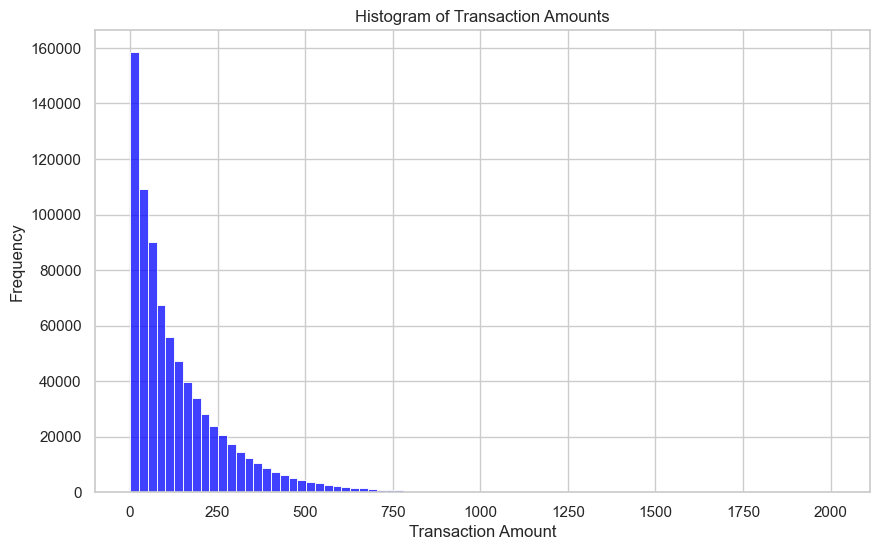

In [26]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plotting the histogram using seaborn
sns.histplot(df['transactionAmount'], bins=80, kde=False, color='blue')

plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.show()


#### Observations

* The histogram of transaction amounts reveals a `right-skewed distribution`. This means that there is a long tail to the right, indicating that a small number of transactions have significantly higher amounts compared to the majority of transactions
* The long tail might be due to infrequent but high-value purchases, such as luxury items, real estate, or vehicles
* It could potentially represent fraudulent transactions, as large amounts might be indicative of unusual activity
* The histogram might reveal natural clusters or groupings in the data. For example, there could be distinct clusters representing small, medium, and large transactions and Identifying these clusters could be useful for targeted marketing or risk assessment


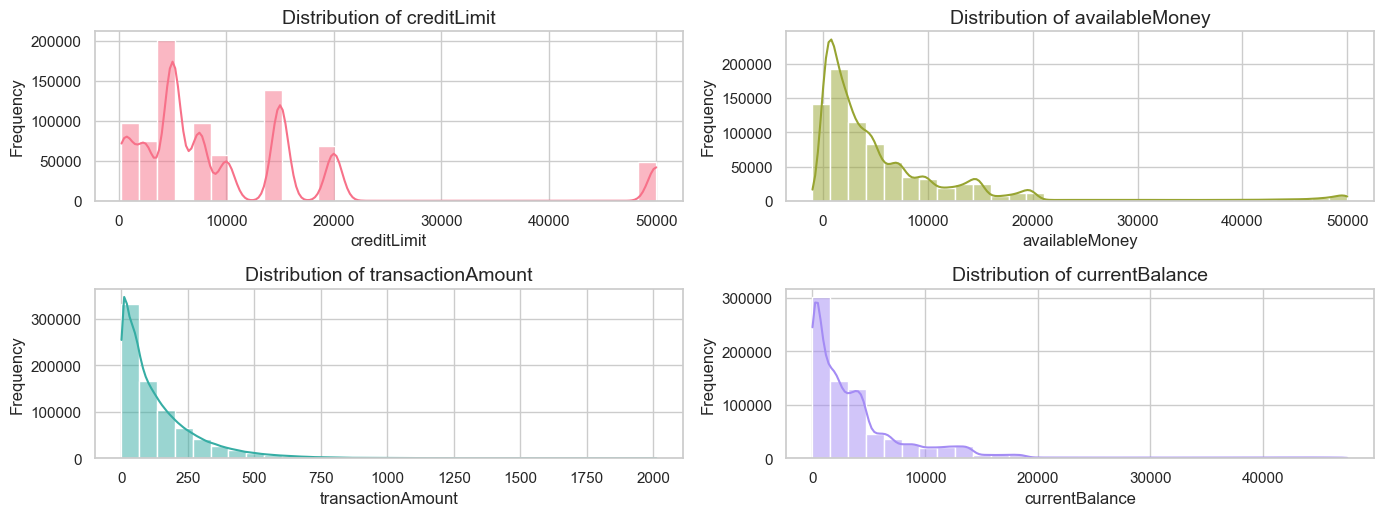

In [27]:
colors = sns.color_palette("husl", len(numerical_feats))  # Using the "husl" color palette from seaborn

plt.figure(figsize=(14, 10))

for i, (col, color) in enumerate(zip(numerical_feats, colors), 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color=color)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

`creditLimit`: The distribution is right-skewed, with a long tail to the right. This indicates that most credit limits are relatively low, but there are a few individuals with much higher credit limits.

`availableMoney`: The distribution is also right-skewed, but to a lesser extent compared to creditLimit. This suggests that most customers have a significant portion of their credit limit available, but there are some with lower available balances

`transactionAmount`: The distribution is heavily right-skewed, with a long tail to the right. This indicates that most transactions are relatively small, but there are a few large transactions that pull the mean to the right

`currentBalance`: The distribution is right-skewed, but not as severely as transactionAmount. This suggests that most customers have a relatively low current balance, but there are some with higher balances.

### Box Plots

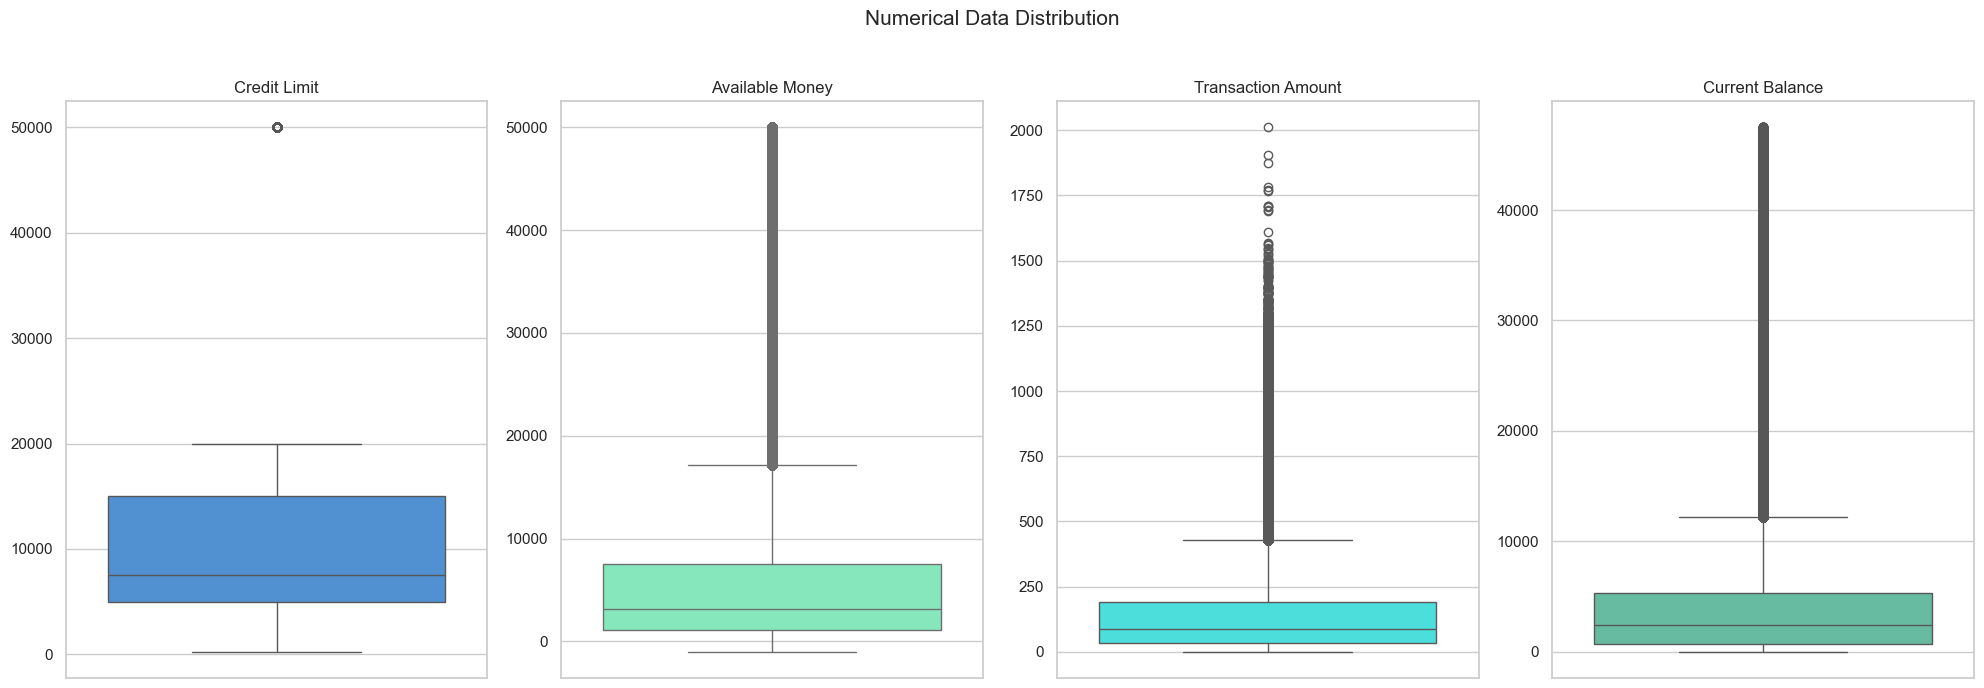

In [28]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_feats), figsize=(20, 7))

neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']

# Plot each numerical feature in a separate subplot
for i, col in enumerate(numerical_feats):
    sns.boxplot(y=cleaned_df[col], ax=axes[i], color=colors[i])
    axes[i].set_title(neat_cols[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# title and layout
fig.suptitle('Numerical Data Distribution', fontsize=15)
plt.tight_layout()
fig.subplots_adjust(top=0.85)

plt.show()

### Key Insights from the Data Distributions of `creditLimit`, `availableMoney`, `transactionAmount`, and `currentBalance`

- **Credit Limit:**
   - The `creditLimit` distribution shows distinct peaks, suggesting that certain credit limits are more common among customers.
   - Notable peaks occur around **5,000**, **10,000**, and **20,000** units.
   - There is a significant spike at **50,000**, indicating that a subset of customers has this as their credit limit, possibly due to a cap or standard credit limit offering by the institution.

- **Available Money:**
   - The `availableMoney` distribution is highly skewed to the right, with the majority of customers having lower available money.
   - A large portion of customers has less than **10,000** units available.
   - The distribution thins out as the available money increases, with very few customers having close to **50,000** units.

- **Transaction Amount:**
   - The `transactionAmount` distribution is heavily skewed to the right, indicating that most transactions are of lower amounts.
   - The majority of transactions are below **250** units.
   - There are very few transactions above **1,000** units, showing that high-value transactions are relatively rare.

- **Current Balance:**
   - The `currentBalance` distribution is similar to that of `availableMoney`, with most customers maintaining a lower balance.
   - A significant number of customers have a current balance below **10,000** units.
   - The tail extends towards **50,000** units, but only a small fraction of customers have balances close to this amount.

These patterns suggest that most customers have lower credit limits, maintain relatively low balances, and frequently conduct transactions of smaller amounts. The presence of peaks in `Credit Limit` and skewness in `Available Money`, `Transaction Amount`, and `Current Balance` indicate varying levels of financial activity and account management among the customers.

## <b>3.2 <span style='color:#0386f7de'>|</span> Categorical Feature Analysis:</b>


In [29]:
categorical_feats = cleaned_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print(categorical_feats)

selected_categorical_feats = [ 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 
                            'posConditionCode', 'merchantCategoryCode',
                            'transactionType', 'cardPresent', 'expirationDateKeyInMatch', 'is_cvv_match', 
                            'hour', 'day_of_week', 'day_of_month', 'month', 'year', 'isFraud']

['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType', 'cardPresent', 'expirationDateKeyInMatch', 'is_cvv_match', 'transaction_date', 'transaction_time', 'hour', 'day_of_week', 'day_of_month', 'month', 'year', 'isFraud']


In [30]:

def add_percentage_labels(ax, counts):
    total = sum(counts)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, -2.5),  # 5 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

def plot_histograms_categorical_features(cleaned_df, features, top_n=10):
    '''
    Args:
        cleaned_df (pandas.DataFrame): The DataFrame containing the cleaned data.
        features (list): A list of categorical features to be visualized.
        top_n (int, optional): The maximum number of categories to display in each histogram. Defaults to 10.

    Returns:
        None
    '''
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols  # Compute number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3.5 * num_rows ), constrained_layout=True)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        # Compute counts and sort them in descending order
        counts = cleaned_df[feature].value_counts()
        sorted_counts = counts.sort_values(ascending=False).nlargest(top_n)

        # Plot bar chart
        ax = axes[idx]
        sns.barplot(x=sorted_counts.index, y=sorted_counts.values, hue=sorted_counts.index,  palette='Set2', ax=ax, legend=False)
        ax.set_title(f'Histogram -- {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

        # Add percentage labels
        add_percentage_labels(ax, sorted_counts)

    # Hide unused subplots
    for ax in axes[num_features:]:
        ax.axis('off')

    plt.show()

In [31]:
high_cardinal_feats_cat = ['merchantName', 'merchantCategoryCode', 'posEntryMode', 'posConditionCode', 'transactionType']
boolean_feats_cat = [ 'cardPresent','expirationDateKeyInMatch', 'is_cvv_match', 'isFraud']
country_feats_cat = [ 'acqCountry', 'merchantCountryCode']
date_features_cat = ['hour', 'day_of_week', 'day_of_month', 'month','year']

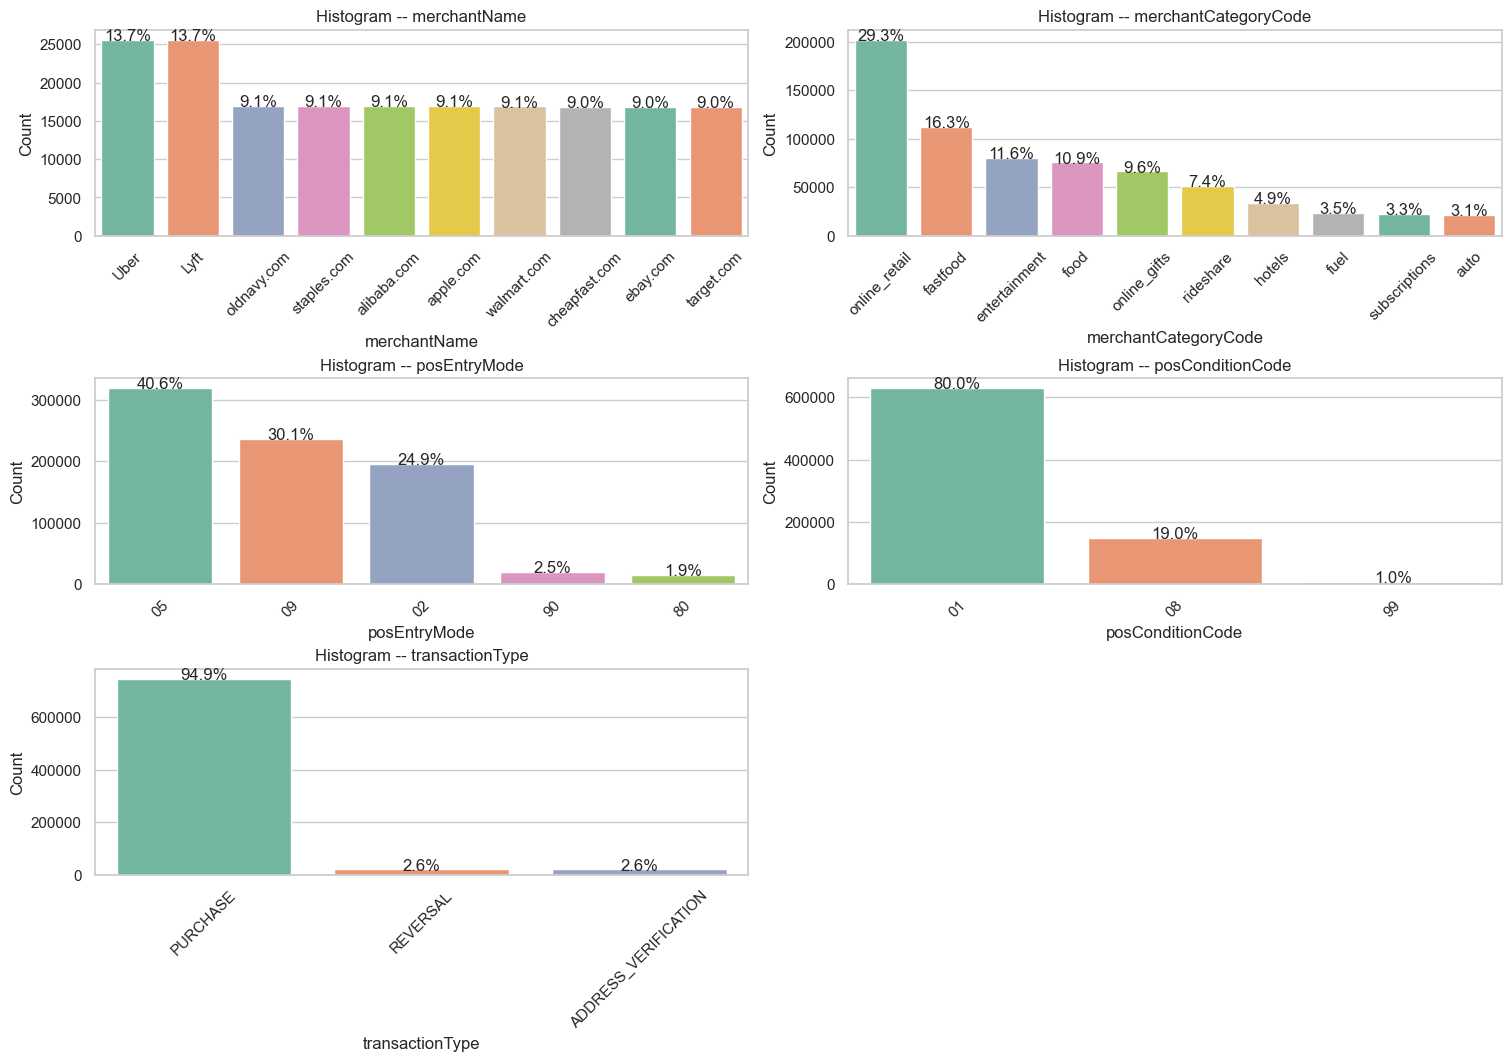

In [32]:
plot_histograms_categorical_features(cleaned_df, high_cardinal_feats_cat)

`Observations:`

- **Merchant Name**:
  - "Uber" and "Lyft" are the most frequent merchants, each accounting for **13.7%** of transactions.
  - The other top merchants (e.g., "oldnavy.com", "staples.com") each account for approximately **9%**.

- **Merchant Category Code**:
  - "Online Retail" dominates with **29.3%** of transactions.
  - "Fast Food" follows at **16.3%**, while other categories like "Entertainment" and "Food" are between **9.6%** and **11.6%**.

- **POS Entry Mode**:
  - The top three modes ("05", "09", "02") cover about **95.6%** of transactions, with "05" being the most common at **40.6%**.

- **POS Condition Code**:
  - "01" is the most frequent, making up **80%** of transactions, followed by "08" at **19%**.

- **Transaction Type**:
  - "PURCHASE" transactions make up the vast majority at **94.9%**.
  - "REVERSAL" and "ADDRESS-VERIFICATION" are much less common, each around **2.6%**.

These insights reflect significant concentration in specific categories, merchants, and transaction types.

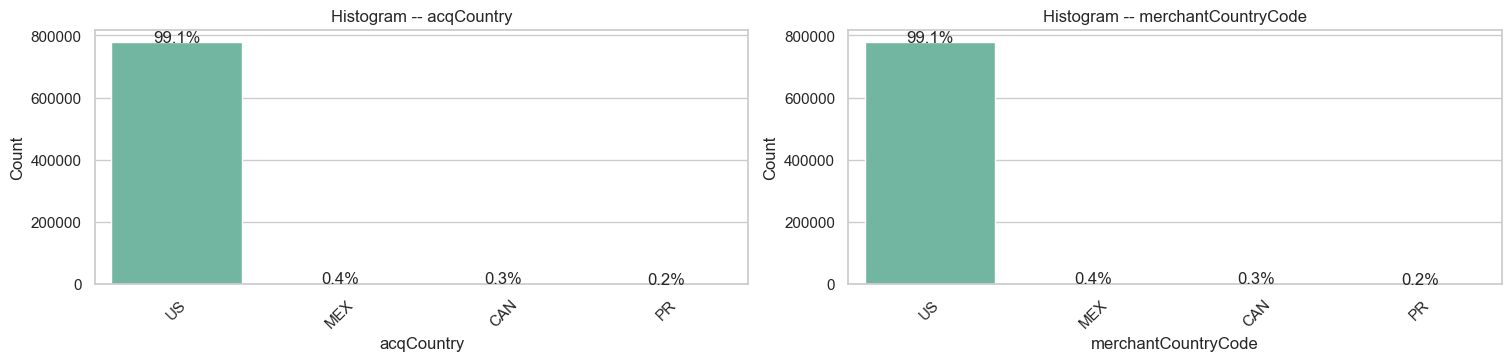

In [33]:
plot_histograms_categorical_features(cleaned_df, country_feats_cat)

`Observations`

* acqCountry
    * **Dominance of US:** The vast majority (99.1%) of transactions originate from the US.
    * **Minorities from Mexico and Canada:** Smaller portions (0.4% each) of transactions come from Mexico and Canada.
    * **Negligible Presence of Other Countries:** Other countries (e.g., CN, PR) have a very small presence in the dataset.

* merchantCountryCode
* **Similar to acqCountry:** The distribution for merchantCountryCode closely resembles that of acqCountry, suggesting that most transactions are processed by merchants located within the US.
    * **Minor International Activity:** A small percentage (0.4%) of transactions involve merchants in Mexico or Canada.
    * **Limited Presence of Other Countries:** As with acqCountry, other countries have minimal representation in the merchant data.

* Overall Conclusion
    * **Strong Domestic Focus:** The data primarily reflects domestic transactions within the US, with limited international activity.
    * **Potential for Further Analysis:** To gain deeper insights into cross-border transactions, a larger dataset with more diverse geographical representation would be beneficial.


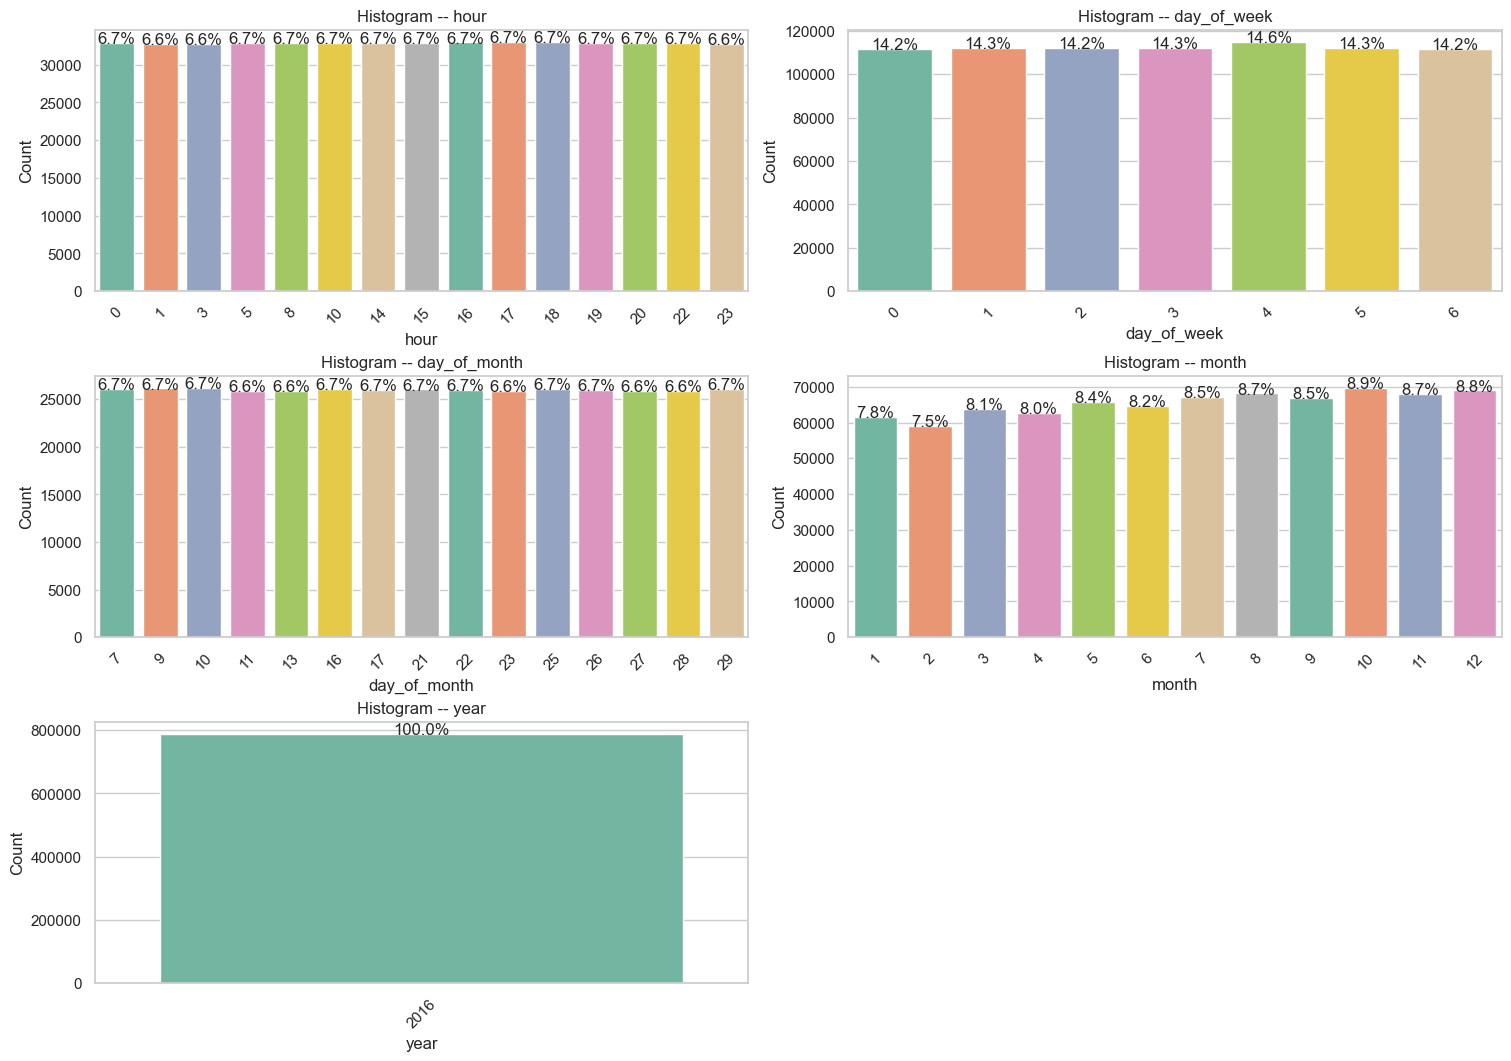

In [34]:
plot_histograms_categorical_features(cleaned_df, date_features_cat, top_n = 15)

`Observations`

* Hour
    * **Uniform Distribution:** The number of transactions appears relatively consistent across different hours of the day, suggesting a uniform distribution.

* Day of Week
    * **Peak on Mondays and Fridays:** The highest number of transactions occurs on Mondays and Fridays, indicating potential business-related patterns or end-of-week activity.
    * **Lower Volumes on Weekends:** Weekends (Saturday and Sunday) generally have lower transaction volumes.

* Hour of Month
    * **Uniform Distribution:** Similar to the hourly distribution, transaction volumes appear relatively evenly spread throughout the month.

* Day of Month
    * **Peak Near End of Month:** There seems to be a slight increase in transactions towards the end of the month, potentially related to bill payments or salary cycles.

* Month
    * **Seasonal Fluctuations:** Some months (e.g., December, January) might show slightly higher or lower transaction volumes, potentially due to seasonal factors like holidays or vacation periods.

* Year
    * **Dominance of 2016:** The data appears to be primarily from the year 2016, with no other years represented.


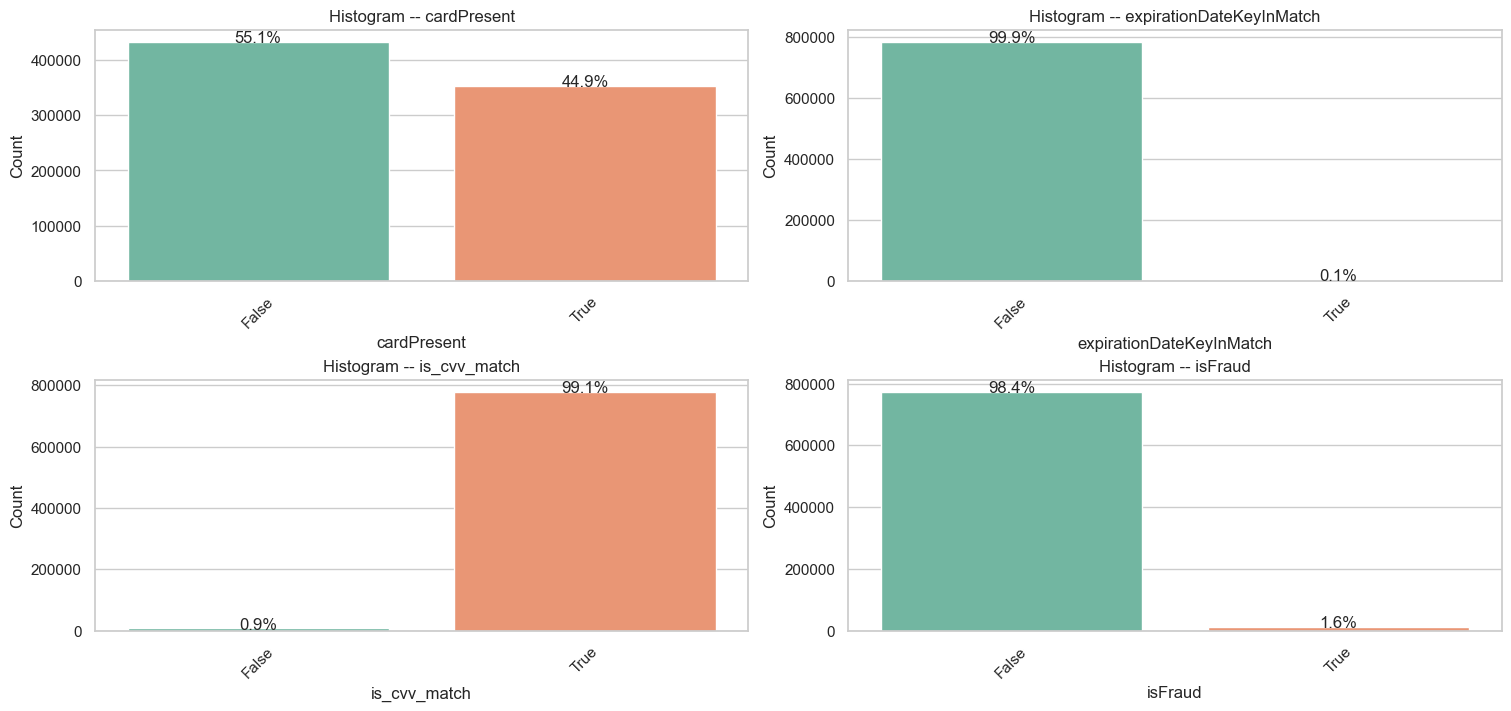

In [35]:
plot_histograms_categorical_features(cleaned_df, boolean_feats_cat)

`Observations`

- Card Present vs. Not Present
    * **Overwhelming Majority:** Most transactions have a card present (55.1%).
    * **Significant Minority:** A substantial portion (44.9%) of transactions do not have a card present.

- Expiration Date Key-in Match vs. No Match
    * **High Match Rate:** The majority of transactions (99.9%) have a matching expiration date.
    * **Low Mismatch Rate:** Only 0.1% of transactions have a mismatched expiration date.

- CVV Match vs. No Match
    * **Very High Match Rate:** An extremely high percentage (99.1%) of transactions have a matching CVV.
    * **Low Mismatch Rate:** Only 0.9% of transactions have a mismatched CVV.

* Fraudulent vs. Non-Fraudulent Transactions
    * **Low Fraud Rate:** `A relatively small percentage (1.6%)` of transactions are flagged as `fraudulent`.
    * **High Non-Fraudulent Rate:** The vast majority (98.4%) of transactions are not fraudulent.

- Correlation Analysis (Inferred)
    * **Strong Correlation between Card Present and Non-Fraudulent Transactions:** Given the high percentage of card present transactions and the low fraud rate, there might be a strong correlation between these two factors.
    * **Weak Correlation between Expiration Date Key-in Match and Fraud:** While the mismatch rate for expiration dates is low, it doesn't seem to be a significant indicator of fraud.
    * **Strong Correlation between CVV Match and Non-Fraudulent Transactions:** Similar to card presence, a high CVV match rate is associated with a low fraud rate.


### Target (isFraud) Distribution

In [36]:
100*cleaned_df.isFraud.value_counts(normalize=True)

isFraud
False    98.420958
True      1.579042
Name: proportion, dtype: float64

`Observations`
* The vast majority of credit card transactions are non-fraudulent with approximately 773,946 transactions. Fraudulent transactions are much rarer, likely numbering less than 12,417.
    - This distribution is typical for credit card fraud detection datasets, demonstrating a significant class imbalance
    - Such imbalance is common in real-world fraud detection scenarios, where legitimate transactions far outnumber fraudulent ones
- `Fraudulent vs. Non-Fraudulent Transactions`
    * **Low Fraud Rate:** `A relatively small percentage (1.6%)` of transactions are flagged as `fraudulent`.
    * **High Non-Fraudulent Rate:** The vast majority (98.4%) of transactions are not fraudulent.

# <b>4 <span style='color:#0386f7de'>|</span> Bi-Variate Analysis</b>


### Transaction Amount vs [Credit Limit, Available Money, Current Balance]

/Users/bhargavi/PycharmProjects/DataScienceChallenge/dscvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


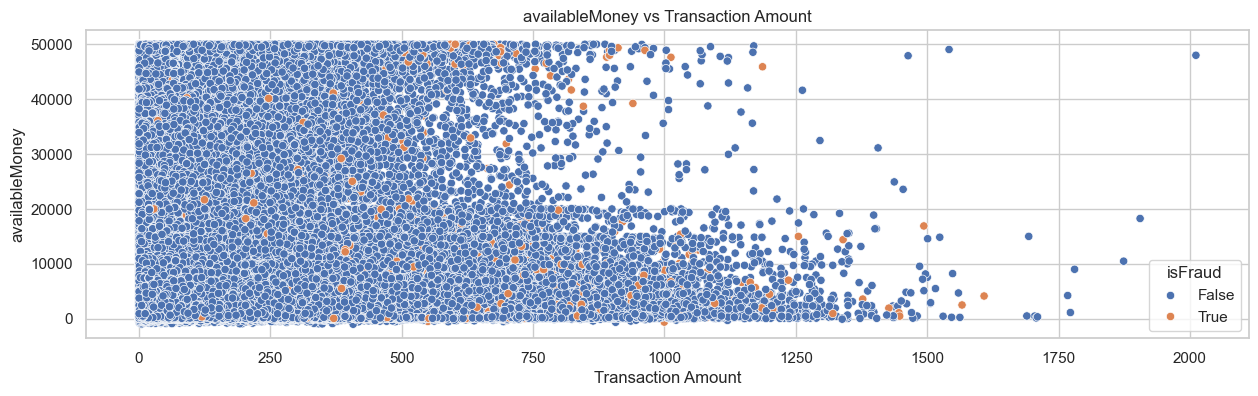

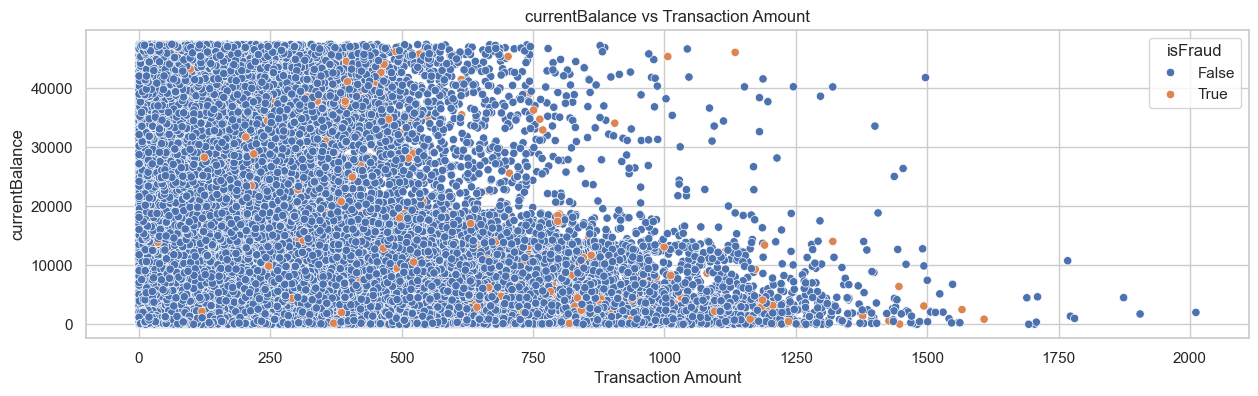

/Users/bhargavi/PycharmProjects/DataScienceChallenge/dscvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


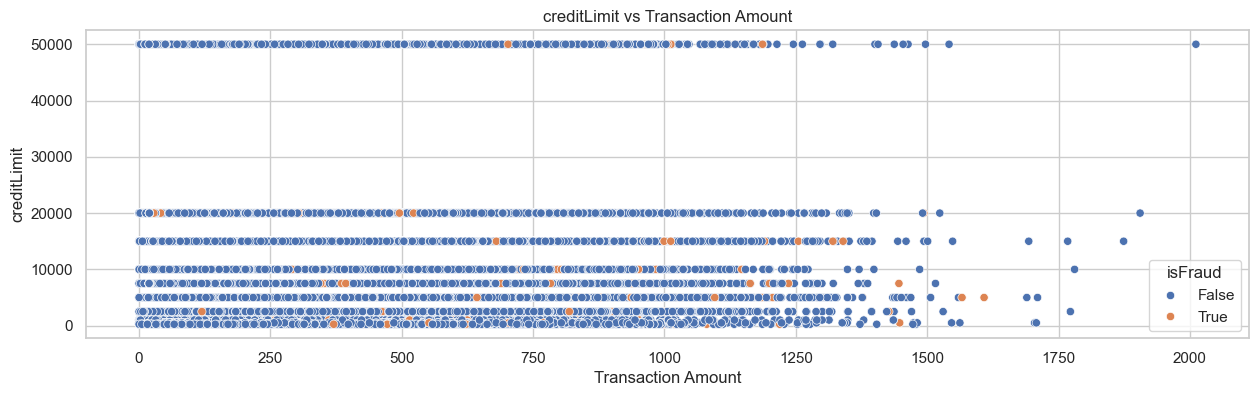

In [37]:
### Plots 
for i in ['availableMoney', 'currentBalance', 'creditLimit']:
    # Plotting Transaction Amount vs. Credit Limit
    plt.figure(figsize=(15, 4))
    sns.scatterplot(y=i, x='transactionAmount', hue='isFraud', data=cleaned_df)
    plt.title(f'{i} vs Transaction Amount')
    plt.ylabel(i)
    plt.xlabel('Transaction Amount')
    plt.grid(True)
    plt.show()


### `Observations`:

- **availableMoney vs Transaction Amount**:

    * There's a wide spread of available money across all transaction amounts, ranging from near 0 to about 50,000.

    * Fraudulent transactions (orange dots) appear to be slightly more common in lower available money ranges.
    
    * The density of transactions decreases as the transaction amount increases, with most transactions occurring below 1,000.


- **currentBalance vs Transaction Amount**:

    * The pattern is very similar to the availableMoney graph, suggesting a strong correlation between available money and current balance.

    * Fraudulent transactions seem to occur more frequently when the current balance is lower.

    * There's a noticeable cluster of transactions with current balances near zero across various transaction amounts.

- **creditLimit vs Transaction Amount**:

    * Credit limits appear to be set at discrete levels, with common limits at 50,000, 20,000, 15,000, 10,000, and lower increments.

    * Fraudulent transactions occur across all credit limit levels, but seem slightly more concentrated in lower credit limit ranges.
    
    * Most transactions, regardless of being fraudulent or not, occur at amounts much lower than the credit limit.

### Interesting patterns:

* Fraudulent transactions (orange dots) are present across all ranges of available money, current balance, and credit limits, but appear slightly more frequent in lower ranges.

* The similarity between availableMoney and currentBalance graphs suggests these variables are closely related in determining transaction patterns and fraud likelihood.

* There's a clear discretization of credit limits, which could be a factor in how fraudsters target accounts.

### Each Features vs Target variable

In [38]:
def bivariate_kde(feature , df):
    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    sns.kdeplot(df.loc[(df['isFraud']==False),
            feature], color='b', fill=True, label='Not Fraud')
    sns.kdeplot(df.loc[(df['isFraud']==True),
            feature], color='r', fill=True, label='Fraud')
    plt.title(f'Observation of {feature} with Fraud')
    plt.legend(title='Fraud transactions')
    plt.show()

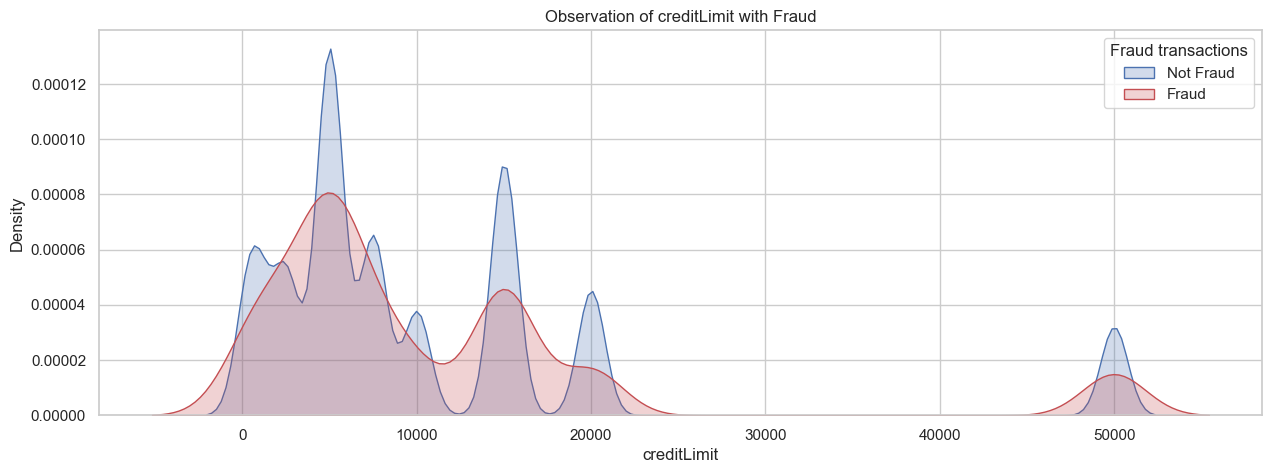

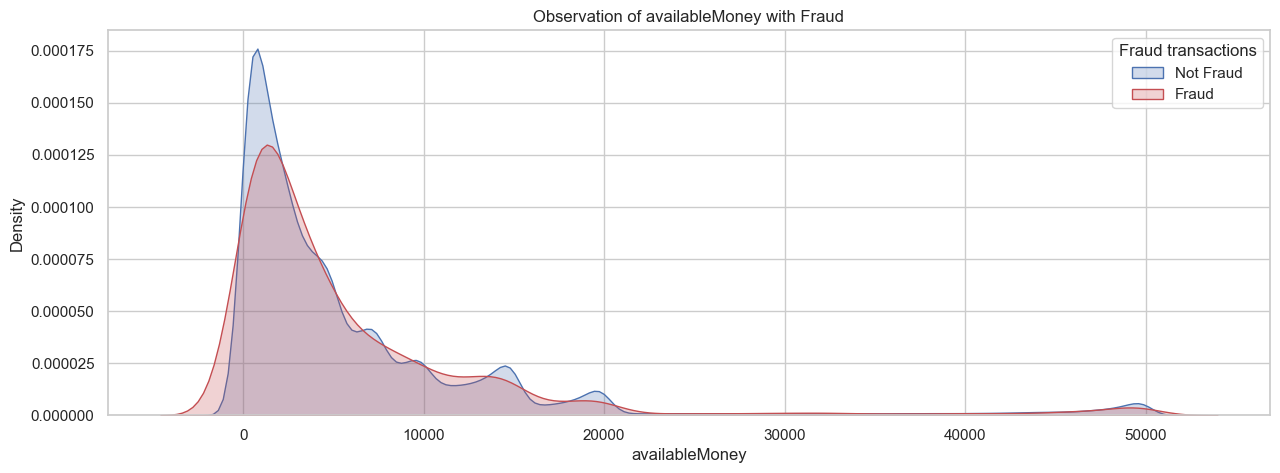

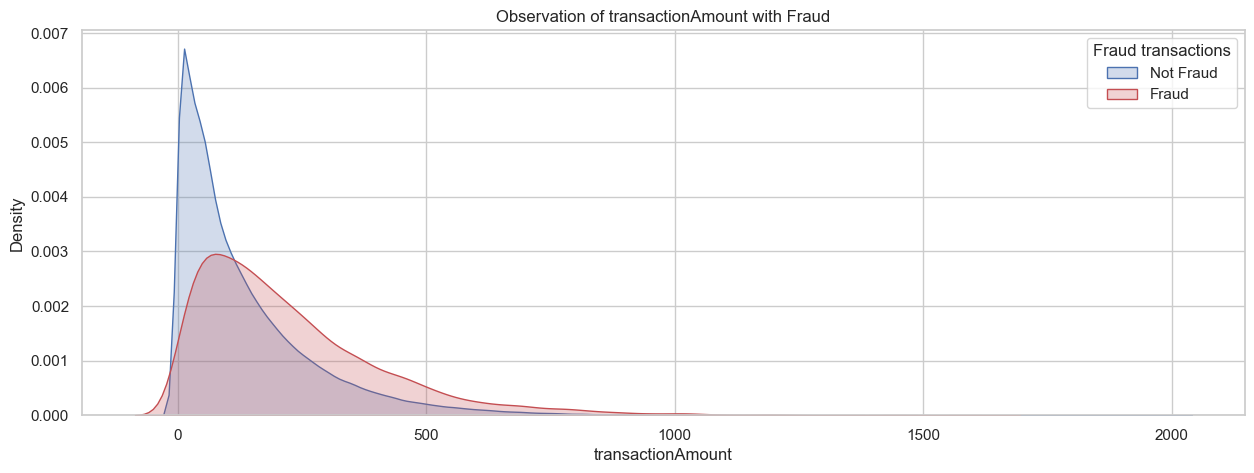

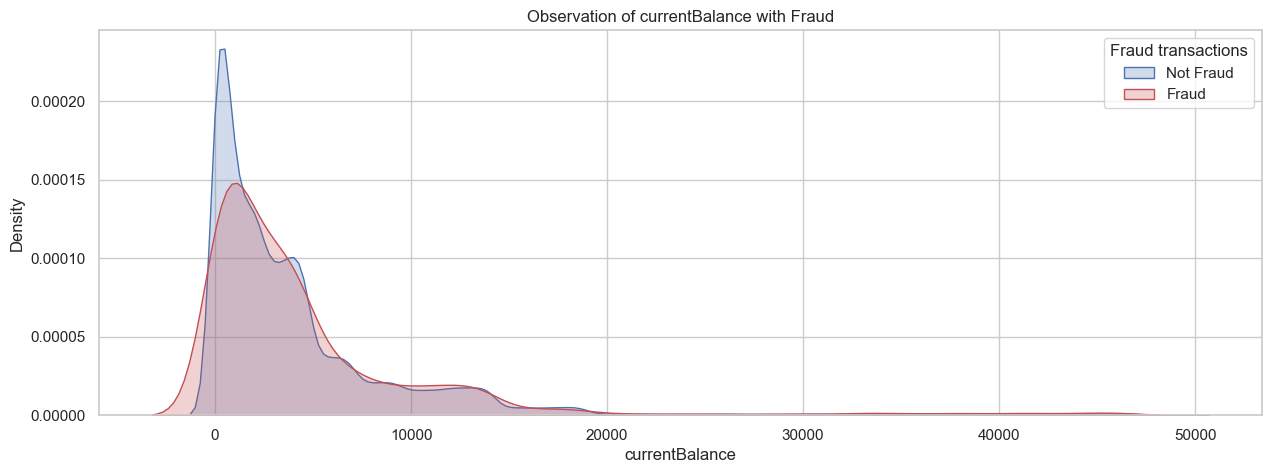

In [39]:
for feature in numerical_feats:
    bivariate_kde(feature,cleaned_df)

#### Observations

* **CreditLimit vs isFraud:**

    * The two density curves overlap to a significant extent, indicating that there is no clear separation between the credit limit distributions for fraudulent and non-fraudulent transactions
    * Both distributions have a similar shape, with a peak around the lower credit limit values and a long tail to the right. This suggests that the majority of transactions, regardless of whether they are fraudulent or not, occur at lower credit limits

* **Available Money vs isFraud:**

    * Both distributions have a almost same shape, with a peak around the lower availableMoney values and a long tail to the right. This suggests that the majority of transactions, regardless of whether they are fraudulent or not, occur with lower availableMoney
    * There are some subtle differences between the distributions. The curve for fraudulent transactions appears to have a slightly higher peak and a slightly longer tail on the right side compared to the curve for non-fraudulent transactions

* **TransactionAmount vs isFraud:**
    * The curve for fraudulent transactions appears to have a slightly higher peak and a slightly longer tail on the right side compared to the curve for non-fraudulent transactions
    * This also similarly suggest that majority of transactions, regardless of whether they are fraudulent or not, occur with lower transactionAmount

* **CreditBalance vs isFraud:**
    * There's significant overlap between fraudulent and non-fraudulent transactions across most balance levels
    * The distributions are very similar, making it challenging to distinguish fraud based solely on currentBalance
    * The similarity in distributions suggests that currentBalance by itself may not be a strong predictor of fraud, and other features would likely be needed in combination for effective fraud detection

In [40]:
def plot_high_cardinality_dist_with_target(df, feature, top_n=20):
    '''
    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        feature (str): The name of the high-cardinality categorical feature to analyze.
        top_n (int, optional): The maximum number of categories to display based on total counts. Defaults to 20.

    Returns:
        pandas.DataFrame: A DataFrame with the top `top_n` categories of the feature, showing:
            - `Not_Fraud` (int): The count of non-fraudulent instances per category.
            - `Fraud` (int): The count of fraudulent instances per category.
            - `Total_Count` (int): The total count of instances per category.
            - `Fraud_Percentage` (float): The percentage of fraudulent instances per category.
            - `Data_Distribution_Percentage` (float): The percentage of total data distribution for each category.
    '''
    # Map the boolean target variable to 1 (True) and 0 (False)
    df['Target'] = df['isFraud'].map({True: 1, False: 0})
    
    # Aggregate counts by feature values
    feature_counts = df.groupby(feature).agg(
        Not_Fraud=('Target', lambda x: (x == 0).sum()),
        Fraud=('Target', lambda x: (x == 1).sum())
    ).reset_index()
    
    # Sort by total count and select top N categories
    feature_counts['Total_Count'] = feature_counts['Not_Fraud'] + feature_counts['Fraud']
    feature_counts = feature_counts.sort_values(by='Total_Count', ascending=False).head(top_n)
    
    # Calculate percentages
    feature_counts['Fraud_Percentage'] = (100 * feature_counts['Fraud'] / feature_counts['Total_Count']).round(2)
    feature_counts['Data_Distribution_Percentage'] = (100 * feature_counts['Total_Count'] / feature_counts['Total_Count'].sum()).round(2)
    
    return feature_counts

def plot_multiple_high_cardinality_dist_with_target(df, features, top_n=20):
    '''
    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        features (list): A list of high-cardinality categorical features to analyze and visualize.
        top_n (int, optional): The maximum number of categories to display in each plot. Defaults to 20.

    Returns:
        None
    '''
    num_features = len(features)
    num_cols = 2  # Number of charts in a row
    num_rows = (num_features + 1) // num_cols  # Calculate required rows based on number of features
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for i, feature in enumerate(features):
        feature_counts = plot_high_cardinality_dist_with_target(df, feature, top_n)
        
        # Bar plot for data distribution percentage
        sns.barplot(x=feature_counts[feature], y=feature_counts['Data_Distribution_Percentage'], color='skyblue', ax=axes[i])
        axes[i].set_ylabel(f"% Frequency of {feature}", color='skyblue')
        
        # Line plot for percentage of fraud cases
        ax2 = axes[i].twinx()
        sns.lineplot(x=feature_counts[feature], y=feature_counts['Fraud_Percentage'], color='red', marker='o', ax=ax2)
        ax2.set_ylabel("% Fraud", color='red')
        
        # Set x-axis label
        axes[i].set_xlabel(f"{feature}")
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
        
        # Set the title of the plot
        axes[i].set_title(f"{feature} - Distribution with isFraud Trace")
    
    # Hide unused subplots
    for ax in axes[num_features:]:
        ax.axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

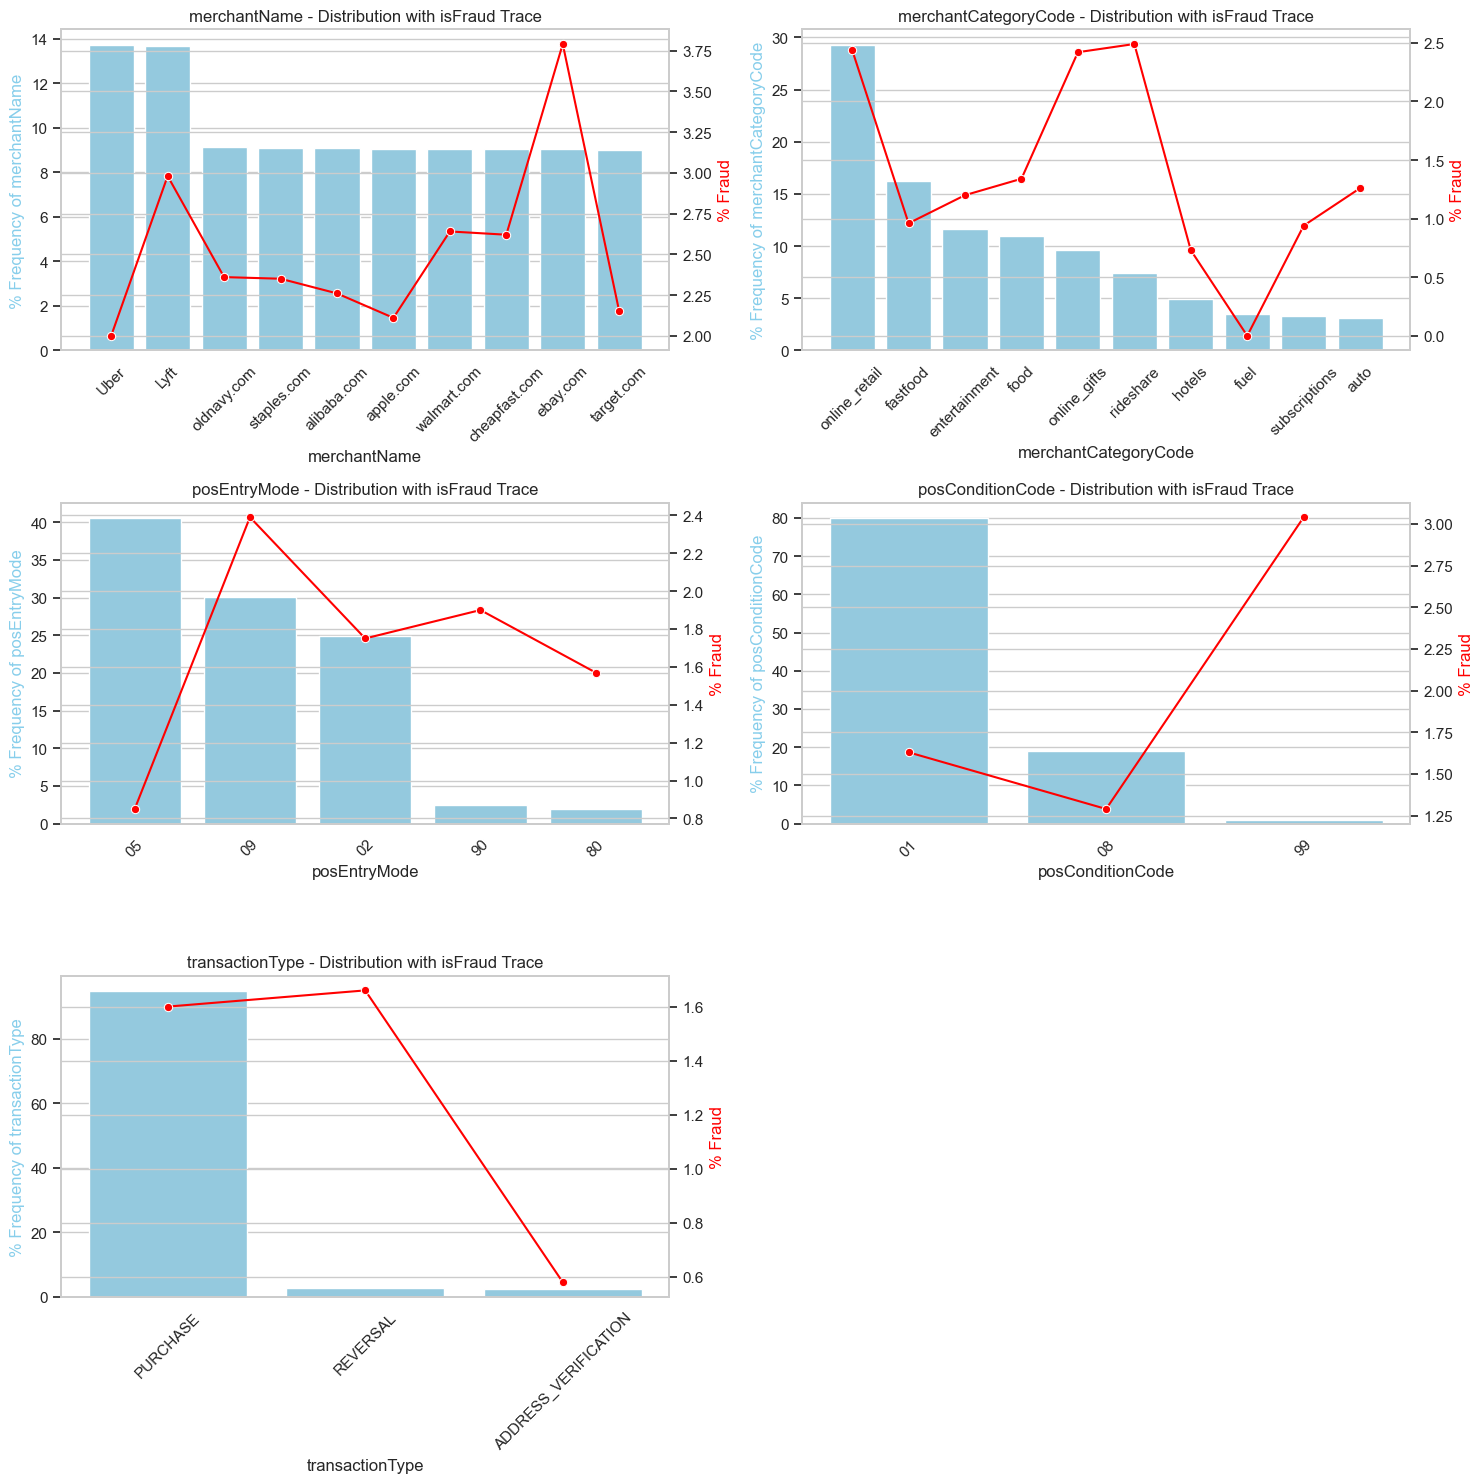

In [41]:
# Features
high_cardinal_feats_cat = ['merchantName', 'merchantCategoryCode', 'posEntryMode', 'posConditionCode', 'transactionType']
boolean_feats_cat = [ 'cardPresent','expirationDateKeyInMatch', 'is_cvv_match', 'isFraud']
country_feats_cat = [ 'acqCountry', 'merchantCountryCode']
date_features_cat = ['hour', 'day_of_week']


# Plotting the distributions
plot_multiple_high_cardinality_dist_with_target(cleaned_df, high_cardinal_feats_cat, top_n=10)


1. **merchantName Distribution:**

    * The top merchants by transaction volume are Lyft, Uber, and ordinarycom
    * Fraud rates vary significantly across merchants
    * eBay.com has the highest fraud rate, followed by ordinarycom and etsy.com
    * Some popular merchants like Lyft and Uber have relatively low fraud rates
    
Some popular services (like ride-sharing apps) seem to have effective fraud prevention measures in place, as indicated by their low fraud rates despite high transaction volumes

2. **merchantCategoryCode Distribution:**

    * The most common merchant categories are online_retail, fastfood, and entertainment
    * Fraud rates are highest in the hotels category, followed by subscription_services and auto
    * Some categories like fuel have very low fraud rates


3. **posEntryMode Distribution:**

    * The most common entry modes are 05, 01, and 02
    * Mode 09 has the highest fraud rate, significantly higher than others
    * Mode 05, despite being the most common, has a relatively low fraud rate


4. **posConditionCode Distribution:**

    * Code 01 is by far the most common.
    * However, code 99 has a dramatically higher fraud rate, despite being less common.


5. **transactionType Distribution:**

    * PURCHASE is the most common transaction type by a large margin
    * PURCHASE and REVERSAL have similar fraud rates
    * ADDRESS_VERIFICATION has a much lower fraud rate

While PURCHASE transactions are most common, they're not necessarily the most risky in terms of fraud rate

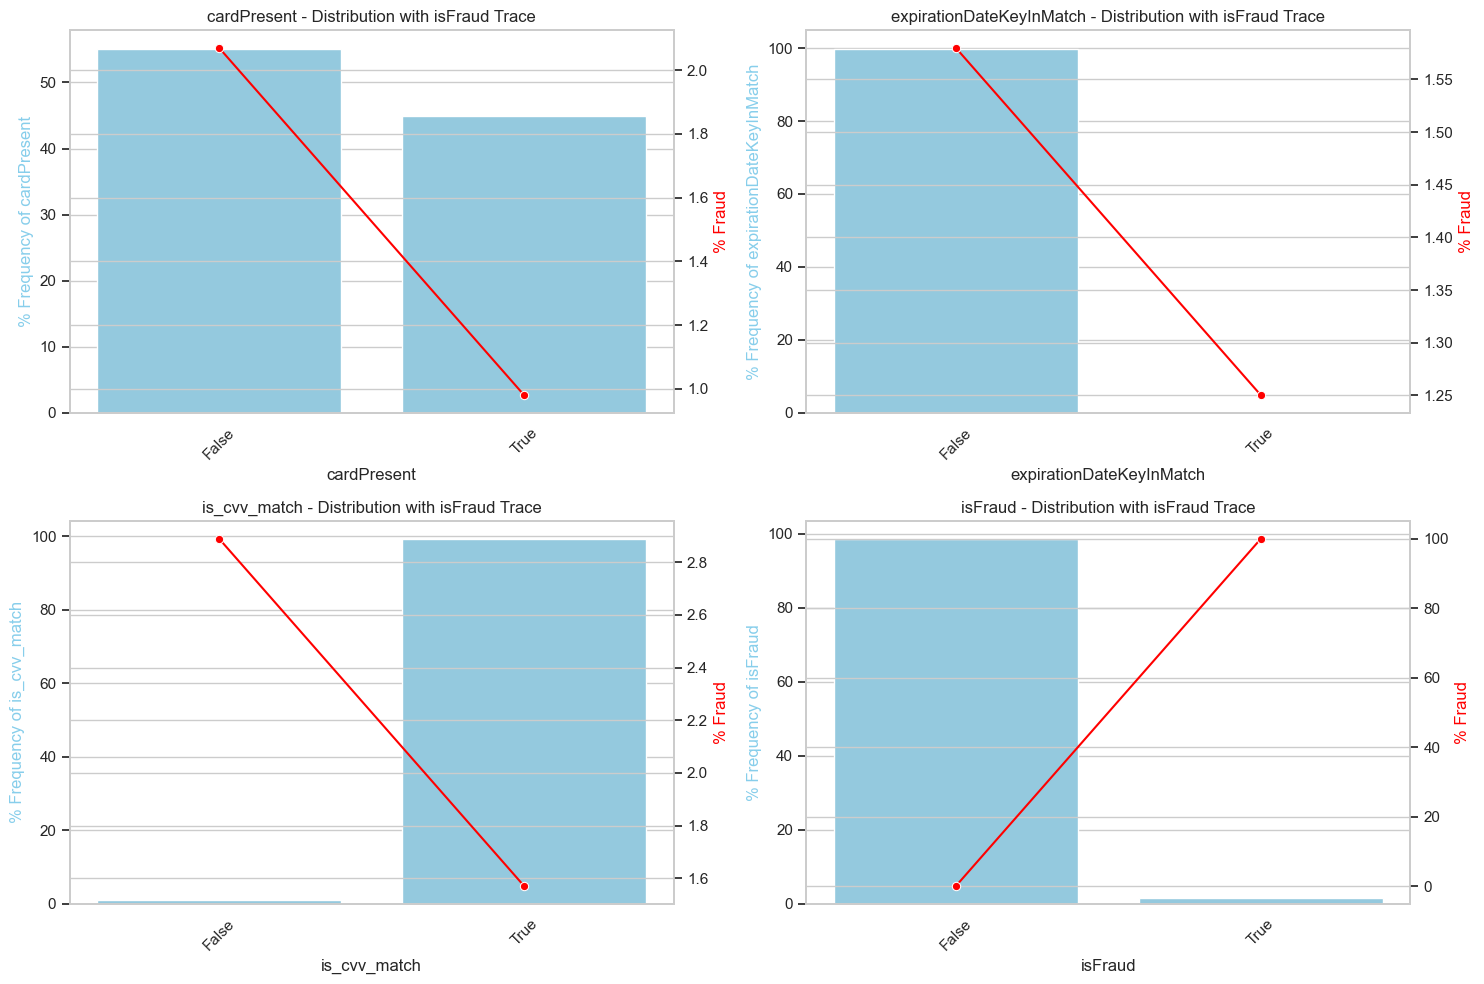

In [42]:
plot_multiple_high_cardinality_dist_with_target(cleaned_df, boolean_feats_cat, top_n=10)


1. **cardPresent:**

    * The distribution is fairly even between "False" (card not present) and "True" (card present) transactions
    * Card-not-present transactions (False) have a significantly higher fraud rate (about 2.1%) compared to card-present transactions (about 1%)
    * This suggests that online or phone transactions are more susceptible to fraud than in-person transactions


2. **expirationDateKeyInMatch Distribution:**

    * The majority of transactions have a matching expiration date (True)
    * Transactions where the expiration date doesn't match (False) have a higher fraud rate (about 1.57%) compared to those that do match (about 1.25%)
    * This indicates that mismatched expiration dates could be a potential fraud indicator, though the difference is not as pronounced as with card presence


3. **is_cvv_match Distribution:**

    * The vast majority of transactions have a matching CVV (Card Verification Value) code (True)
    * Transactions with non-matching CVV codes (False) have a significantly higher fraud rate (about 2.9%) compared to those with matching CVV codes (about 1.6%)
    * This suggests that CVV mismatch is a strong indicator of potential fraud

* When CVV does not match (is_cvv_match = False):

    * `Total Transactions:` 7,015

    * `Fraudulent Transactions:` 203

    * `Fraud Percentage:` 2.89%

* When CVV matches (is_cvv_match = True):

    * `Total Transactions:` 779,348

    * `Fraudulent Transactions:` 12,214

    * `Fraud Percentage:` 1.57%

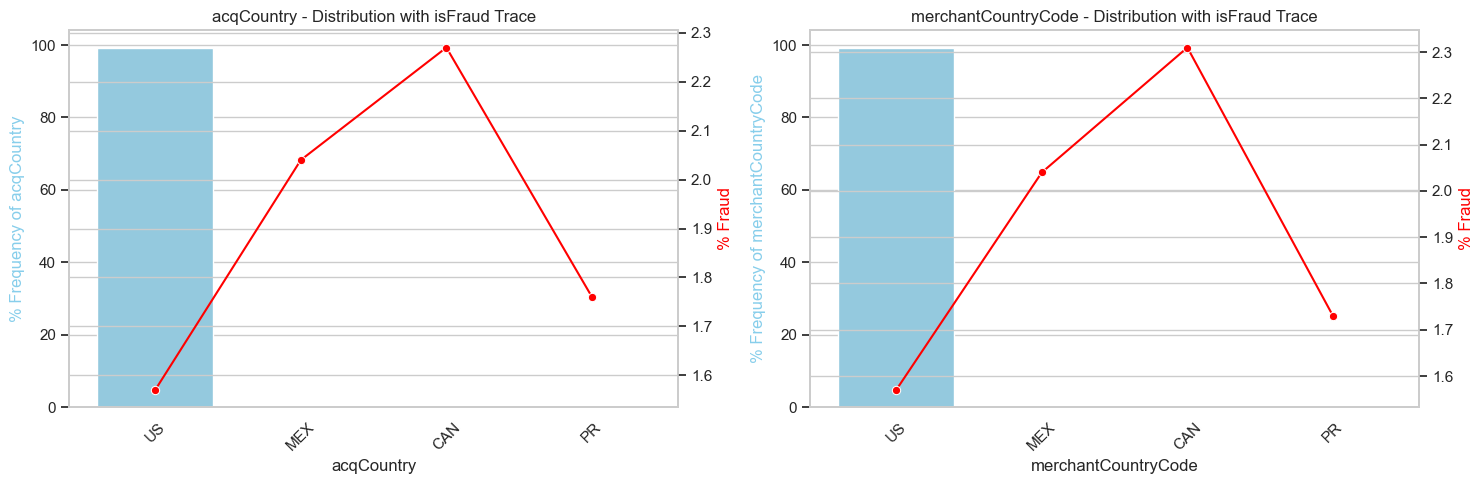

In [43]:
plot_multiple_high_cardinality_dist_with_target(cleaned_df, country_feats_cat, top_n=10)


* In both plots, the US has the highest percentage of transactions (around 95-100%), while other countries have very low transaction percentages.
* The fraud rate varies across countries, with Canada (CAN) showing the highest fraud rate in both plots (around 2.3%), followed by Mexico, France, and the US having the lowest fraud rate

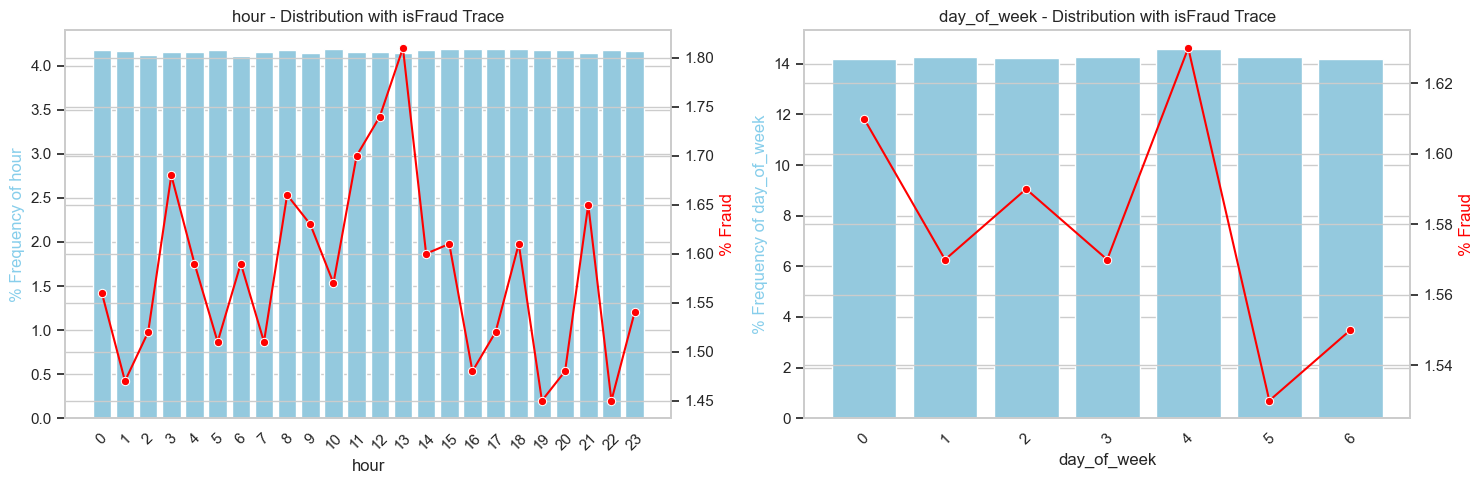

In [44]:
plot_multiple_high_cardinality_dist_with_target(cleaned_df, date_features_cat, top_n=31)

1. **Hour vs isFraud:**
    * The frequency of transactions appears relatively consistent across different hours of the day, with a slight increase during peak business hours (e.g., 9-10 AM, 12-1 PM)
    * The percentage of fraudulent transactions fluctuates throughout the day, with some hours showing higher rates than others
    * There doesn't seem to be a clear correlation between the frequency of transactions and the percentage of fraud

2. **Day of week vs isFraus:**

    * The frequency of transactions is generally higher on weekdays compared to weekends
    * The percentage of fraudulent transactions appears to be slightly higher on weekends, but the difference is not significant
    * There doesn't seem to be a strong correlation between the frequency of transactions and the percentage of fraud

In [45]:
cleaned_df.head()

,accountNumber,transaction_datetime,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,is_cvv_match,transaction_date,transaction_time,hour,day_of_week,day_of_month,month,year,isFraud,Target
0,737265056,2016-08-13 14:27:32,5000,5000.0,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-08-13,14:27:32,14,5,13,8,2016,False,0
1,737265056,2016-10-11 05:05:54,5000,5000.0,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE,0.0,True,False,True,2016-10-11,05:05:54,5,1,11,10,2016,False,0
2,737265056,2016-11-08 09:18:39,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-11-08,09:18:39,9,1,8,11,2016,False,0
3,737265056,2016-12-10 02:14:50,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.0,False,False,True,2016-12-10,02:14:50,2,5,10,12,2016,False,0
4,830329091,2016-03-24 21:04:46,5000,5000.0,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,PURCHASE,0.0,True,False,True,2016-03-24,21:04:46,21,3,24,3,2016,False,0


## <b>5 <span style='color:#0386f7de'>|</span> Data Transformation</b>
#### Encode Categorical Data using Dumies, and Encoders.

In [46]:
irrelevant_features_to_drop = ['accountNumber', 'transaction_datetime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange',  'transaction_date', 'transaction_time', 'year']

t_df = cleaned_df.drop(irrelevant_features_to_drop, axis=1).copy()
# t_df.drop('isFraud',axis=1, inplace=True)

# Convert Date features to numerical 
for i in ['hour', 'day_of_week', 'day_of_month', 'month']:
    t_df[i] = t_df[i].astype('int')

# Convert Boolean Feature to int by mapping
for i in t_df.select_dtypes(include=[ 'bool']).columns.tolist():
    t_df[i] = t_df[i].map({True: 1, False:0})

# Select all the label encoded required features
label_encode_features = t_df.select_dtypes(include=['object', 'category']).columns.tolist()
for i in label_encode_features:
    print(f"{i} --> {t_df[i].nunique()} --> {t_df[i].unique()[:10]}\n\n")

merchantName --> 2490 --> ['Uber' 'AMC #191138' 'Play Store' 'Tim Hortons #947751'
 'In-N-Out #422833' 'Krispy Kreme #685312' 'Shake Shack #968081'
 'Burger King #486122' 'Five Guys #510989' "Auntie Anne's #747964"]


acqCountry --> 4 --> ['US' 'CAN' 'MEX' 'PR']


merchantCountryCode --> 4 --> ['US' 'CAN' 'PR' 'MEX']


posEntryMode --> 5 --> ['02' '09' '05' '80' '90']


posConditionCode --> 3 --> ['01' '08' '99']


merchantCategoryCode --> 19 --> ['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care']


transactionType --> 3 --> ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL']




In [47]:
t_df.head()

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,is_cvv_match,hour,day_of_week,day_of_month,month,isFraud,Target
0,5000,5000.0,98.55,Uber,US,US,02,01,rideshare,PURCHASE,0.0,0,0,1,14,5,13,8,0,0
1,5000,5000.0,74.51,AMC #191138,US,US,09,01,entertainment,PURCHASE,0.0,1,0,1,5,1,11,10,0,0
2,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,1,9,1,8,11,0,0
3,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,1,2,5,10,12,0,0
4,5000,5000.0,71.18,Tim Hortons #947751,US,US,02,01,fastfood,PURCHASE,0.0,1,0,1,21,3,24,3,0,0


### Transform - Categorical Features using Label Encoder

In [48]:

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
for i in label_encode_features:
    t_df[i] = le.fit_transform(t_df[i])

In [49]:
t_df.head()

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,is_cvv_match,hour,day_of_week,day_of_month,month,isFraud,Target
0,5000,5000.0,98.55,2086,3,3,0,0,17,1,0.0,0,0,1,14,5,13,8,0,0
1,5000,5000.0,74.51,27,3,3,2,0,3,1,0.0,1,0,1,5,1,11,10,0,0
2,5000,5000.0,7.47,1305,3,3,2,0,12,1,0.0,0,0,1,9,1,8,11,0,0
3,5000,5000.0,7.47,1305,3,3,2,0,12,1,0.0,0,0,1,2,5,10,12,0,0
4,5000,5000.0,71.18,2084,3,3,0,0,4,1,0.0,1,0,1,21,3,24,3,0,0


In [50]:
t_df.to_csv("data/transformed_data_all_features.csv", index = False)

## HeatMap

<Axes: >

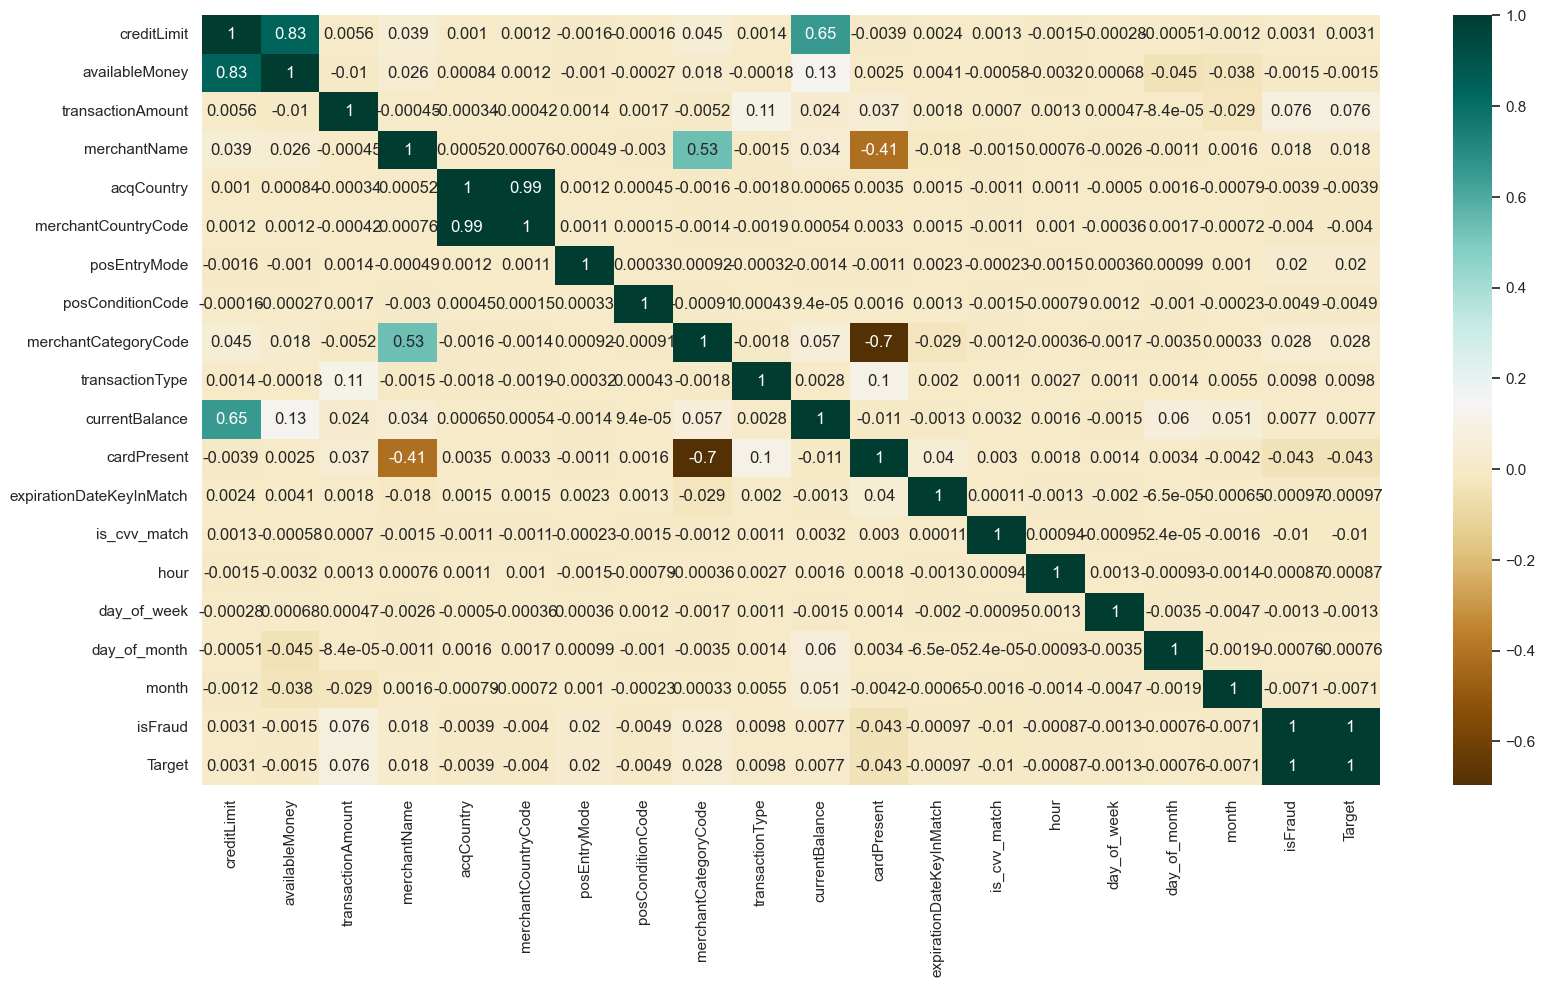

In [51]:
plt.figure(figsize=(19,10))
sns.heatmap(t_df.corr(),annot = True,cmap="BrBG")

### Insights

#### Strong correlations:

* `acqCountry` and `merchantCountryCode (0.99):` Extremely high correlation, suggesting redundancy.
* `creditLimit` and `currentBalance (0.65):` Strong positive correlation.
* `merchantName` and `merchantCategoryCode (0.53):` Moderate correlation, but both likely provide unique information.


#### Notable negative correlations:

* `cardPresent` with `merchantCategoryCode (-0.7)` and `merchantName (-0.41):` This suggests certain merchant categories or specific merchants are less likely to have card-present transactions.


#### Features with low correlations overall:

* `posEntryMode, posConditionCode:` Very low correlations with most other features.
* `is_cvv_match, expirationDateKeyInMatch:` Low correlations across the board.
* `day_of_week, hour, day_of_month, month:` Time-related features show very low correlations with other features.


Potential feature groups:

Financial indicators: creditLimit, availableMoney, currentBalance (moderately correlated with each other)
Transaction details: transactionAmount, transactionType
Merchant information: merchantName, merchantCategoryCode, merchantCountryCode
Card details: cardPresent, is_cvv_match, expirationDateKeyInMatch
Temporal features: hour, day_of_week, day_of_month, month



#### Feature selection:

* Removing one of acqCountry or merchantCountryCode due to their high correlation
* Keeping one of creditLimit, availableMoney, and currentBalance as they likely provide important financial context, lets perform OLS regression and remove one or more of them
* Retain merchantName and merchantCategoryCode for now despite their correlation, as they may offer valuable categorical information, lets check for more feature importance technique to finalize
* Consider the importance of `cardPresent` due to its strong negative correlations with merchant features


## OLS

In [52]:
cleaned_df['isFraud'].shape, t_df.shape

((786363,), (786363, 20))

In [53]:
t_df.head()

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,is_cvv_match,hour,day_of_week,day_of_month,month,isFraud,Target
0,5000,5000.0,98.55,2086,3,3,0,0,17,1,0.0,0,0,1,14,5,13,8,0,0
1,5000,5000.0,74.51,27,3,3,2,0,3,1,0.0,1,0,1,5,1,11,10,0,0
2,5000,5000.0,7.47,1305,3,3,2,0,12,1,0.0,0,0,1,9,1,8,11,0,0
3,5000,5000.0,7.47,1305,3,3,2,0,12,1,0.0,0,0,1,2,5,10,12,0,0
4,5000,5000.0,71.18,2084,3,3,0,0,4,1,0.0,1,0,1,21,3,24,3,0,0


In [54]:
cols = t_df.columns.tolist()
cols.remove("isFraud")
cols.remove("Target")

model = sm.OLS(t_df['isFraud'], t_df[cols]).fit()
model.summary() #sumarizes the stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                isFraud   R-squared (uncentered):                   0.024
Model:                            OLS   Adj. R-squared (uncentered):              0.024
Method:                 Least Squares   F-statistic:                              1077.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):                        0.00
Time:                        19:05:24   Log-Likelihood:                      5.2483e+05
No. Observations:              786363   AIC:                                 -1.050e+06
Df Residuals:                  786345   BIC:                                 -1.049e+06
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
creditLimit               -1.56e+04   1.32e+05     -0.118      0.906   -2.75e+05    2.44e+05
availableMoney             1.56e+04   1.32e+05      0.118      0.906   -2.44e+05    2.75e+05
transactionAmount          6.48e-05   9.54e-07     67.910      0.000    6.29e-05    6.67e-05
merchantName              2.457e-07   1.84e-07      1.339      0.181   -1.14e-07    6.05e-07
acqCountry                   0.0066      0.006      1.141      0.254      -0.005       0.018
merchantCountryCode         -0.0033      0.006     -0.575      0.565      -0.015       0.008
posEntryMode                 0.0028      0.000     18.520      0.000       0.003       0.003
posConditionCode            -0.0013      0.000     -4.142      0.000      -0.002      -0.001
merchantCategoryCode        -0.0002   3.94e-05     -4.513      0.000      -0.000      -0.000
transactionType              0.0055      0.001      8.901      0.000       0.004       0.007
currentBalance             1.56e+04   1.32e+05      0.118      0.906   -2.44e+05    2.75e+05
cardPresent                 -0.0128      0.000    -32.498      0.000      -0.014      -0.012
expirationDateKeyInMatch     0.0025      0.004      0.660      0.509      -0.005       0.010
is_cvv_match                -0.0038      0.001     -3.111      0.002      -0.006      -0.001
hour                      3.839e-06   2.02e-05      0.190      0.849   -3.57e-05    4.33e-05
day_of_week              -1.736e-05   6.99e-05     -0.248      0.804      -0.000       0.000
day_of_month              1.415e-06   1.59e-05      0.089      0.929   -2.98e-05    3.26e-05
month                       -0.0002   4.06e-05     -3.740      0.000      -0.000   -7.23e-05
==============================================================================
Omnibus:                  1022568.369   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        115580611.701
Skew:                           7.670   Prob(JB):                         0.00
Kurtosis:                      60.378   Cond. No.                     3.21e+13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.94e-13. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Insignificant Features (P > 0.05)(rejection region):


* `creditLimit` (P = 0.906) removed
* `availableMoney` (P = 0.906)
* `merchantName` (P = 0.181) removed
* `acqCountry` (P = 0.254)
* `merchantCountryCode` (P = 0.565) removed
* `currentBalance` (P = 0.906) removed
* `expirationDateKeyInMatch` (P = 0.509) removed
* `hour` (P = 0.849) removed
* `day_of_week` (P = 0.804) removed
* `day_of_month` (P = 0.929) removed


### Feature Selection

Based on Heapmap and OLS regression results, we can remove the following features

* `creditLimit` and `currentBalance` :  As creditLimit and availableMoney have high correlation from Heatmap and show less significance in OLS regression. Hence, we can remove one
*  `merchantName` : As merchantName, merchantCategoryCode has coreelation from Heatmap and merchantCategoryCode has low p value
*  `merchantCountryCode` : As acqCountry and merchantCountryCode have high correlation from Heatmap and merchantCountryCode has high p value
* `expirationDateKeyInMatch` : As it has high p value
* `hour`, `day_of_week`, `day_of_month` : As they have very high p value

In [55]:
t_df.drop(columns = ['creditLimit', 'currentBalance', 'merchantName', 'merchantCountryCode',  'expirationDateKeyInMatch', 'hour', 'day_of_week', 'day_of_month'], inplace = True)

In [56]:
t_df.head()

,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,cardPresent,is_cvv_match,month,isFraud,Target
0,5000.0,98.55,3,0,0,17,1,0,1,8,0,0
1,5000.0,74.51,3,2,0,3,1,1,1,10,0,0
2,5000.0,7.47,3,2,0,12,1,0,1,11,0,0
3,5000.0,7.47,3,2,0,12,1,0,1,12,0,0
4,5000.0,71.18,3,0,0,4,1,1,1,3,0,0


## Permutation Importance

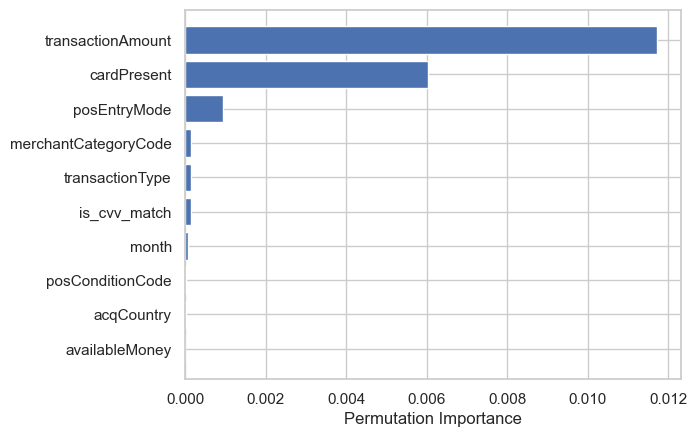

In [57]:
def get_permutation_importance(df):
    # Define features and target
    X = df[['availableMoney', 'transactionAmount', 'acqCountry', 'posEntryMode', 
        'posConditionCode', 'merchantCategoryCode', 'transactionType', 
        'cardPresent', 'is_cvv_match', 'month']]
    y = df["Target"]  
    
    # Split the data
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    
    # Train the model
    model = LinearRegression() 
    model.fit(X_train, y_train)
    
    # Calculate permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1)

    # Plot the results
    feature_names = X_test.columns
    sorted_idx = perm_importance.importances_mean.argsort()

    plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.show()

get_permutation_importance(t_df)


/Users/bhargavi/PycharmProjects/DataScienceChallenge/dscvenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


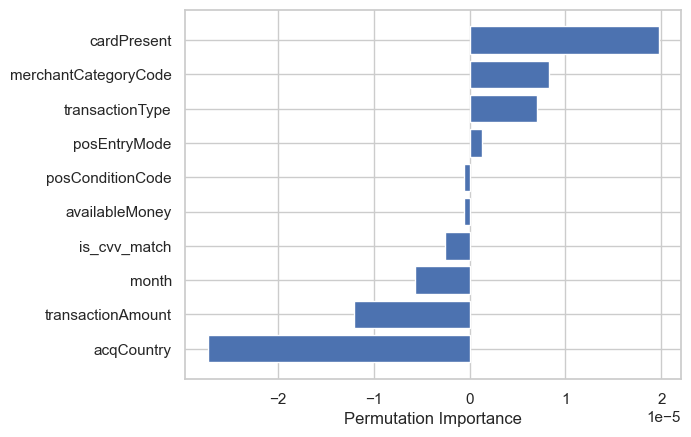

In [58]:

def get_permutation_importance(df):
    # Define features and target
    X = df[['availableMoney', 'transactionAmount', 'acqCountry', 'posEntryMode', 
        'posConditionCode', 'merchantCategoryCode', 'transactionType', 
        'cardPresent', 'is_cvv_match', 'month']]
    y = df["Target"]  
    
    # Split the data
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    
    # Train the model
    model = LogisticRegression() 
    model.fit(X_train, y_train)
    
    # Calculate permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1)

    # Plotting the results
    feature_names = X_test.columns
    sorted_idx = perm_importance.importances_mean.argsort()

    plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.show()

get_permutation_importance(t_df)


Based on results from permutation importance

* `transactionAmount`, `cardPresent`, `posEntryMode` has significantly high importance
* we can remove `availableMoney` feature as it has less importance

In [59]:
t_df.drop(columns = ['availableMoney','Target'],inplace = True)

In [60]:
t_df.shape

(786363, 10)

In [61]:
t_df.head()

,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,cardPresent,is_cvv_match,month,isFraud
0,98.55,3,0,0,17,1,0,1,8,0
1,74.51,3,2,0,3,1,1,1,10,0
2,7.47,3,2,0,12,1,0,1,11,0
3,7.47,3,2,0,12,1,0,1,12,0
4,71.18,3,0,0,4,1,1,1,3,0


In [62]:
######################
# Saving the transformed dataframe for further modelling
######################
t_df.to_csv("data/transformed_data_selected_features.csv", index = False)

In [63]:
!pip freeze > requirements.txt